### CHIRAPA MUADCHAN 98935778
####  MS DATA SCIENCE

## <center> Oakland Race and Equity

### TABLE OF CONTENTS

1. [INDICATOR 1: BUSSINESS OWNERSHIP](#ind1)
    - [DATA VISUALIZATION](#dv1)
    - [INCATOR CALCULATION](#cal1)
    - [ANOVA TEST](#st1)
1. [INDICATOR 4: DISCONNECTED YOUTH](#ind4)
    - [DATA VISUALIZATION](#dv4)
    - [INCATOR CALCULATION](#cal4)
    - [CHI-SQUARE TEST](#st4)  
1. [INDICATOR 5: LABOR FORCE PARTICIPATION](#ind5)
    - [DATA VISUALIZATION](#dv5)
    - [INCATOR CALCULATION](#cal5)
    - [CHI-SQUARE TEST](#st5)
4. [LOGISTIC REGRESSION FOR THE EMPLOYMENT PREDICTION](#ml)
    - [DATA-PREPROCEESING](#data_cleaning)
    - [FEATURE SELECTION](#feature_sel)
    - [K-FOLD CROSS VALIDATION VS LOGISTIC REGRESSION](#kfold)
    - [CONFUSION MATRIX](#confuse)
5. [STATISTICAL TEST: ANOVA](#ano)
6. [PROJECT'S PRESENTATION CONTRIBUTION: >> ANOVA TEST](#ano)
7.[OAKLAND EQUITY REPORT'S CONTRIBUTION: >> THE STACKED BAR CHART OF BUSINESS OWNER EDUCATION](#bs_stackedbar)
8. [OTHER INDICATORS' CALCULATIONS](#other_cal)
    - [INDICATOR 49: ADULT FELONY ARRESTS](#ind49)
    - [INDICATOR 58: DOMESTIC VIOLENCE](#ind58)
    - [INDICATOR 59: HOMICIDES](#ind59)
    - [INDICATOR 60: JEVENLILE FELONY ARRESTS](#ind60)

### Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')    

In [2]:
pca191_Ok = pd.read_csv('pca191_Ok.csv')   ## "I saved "pca191_Ok" after cleaning process as a csv file"

In [3]:
pca181_Ok = pd.read_csv('pca181_Ok.csv')

### CHIRAPA's part

## Indicator 1: Business ownership <a id='ind1'> </a>
Indicator defined: This Indicator measures the percent of employed individuals who are self-employed in their own incorporated business, professional practice, or farm. Score is based on the ratio between the percent of White and percent of African Americans who are business owners.

### Data Visualization <a id='dv1'> </a>

##### Note that: 

African American - 2

Asian - 6

White - 1

Other - 3, 4, 5, 7, 8, 9

Below, I write a function to calculate the percentage of business owners in each race distributed by education level to use in the stack bar chart below.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## define this calculation fn to use later 
def calBusinessRace(df):
    EB_1 =df.loc[(df.SCHL == 'No School')].shape[0]
    EB_2 =df.loc[(df.SCHL == 'LowerThanHighSchool')].shape[0]
    EB_3 =df.loc[(df.SCHL == 'HighSchoolDiploma')].shape[0]
    EB_4 =df.loc[(df.SCHL == 'Associate')].shape[0]
    EB_5 =df.loc[(df.SCHL == 'BachelorDegree')].shape[0]
    EB_6 =df.loc[(df.SCHL == 'MasterDegreeAndHigher')].shape[0]
#     return EB_1 , EB_2 , EB_3 , EB_4 , EB_5
    Total = EB_1 + EB_2 + EB_3 + EB_4 + EB_5 + EB_6

    ind1 = (EB_1 *100) / Total
    ind2 = (EB_2 *100) / Total
    ind3 = (EB_3 *100) / Total
    ind4 = (EB_4 *100) / Total
    ind5 = (EB_5 *100) / Total
    ind6 = (EB_6 *100) / Total

    return round(ind1) , round(ind2) , round(ind3) , round(ind4) , round(ind5), round(ind6)


### Visualize business owners with education 
def _educateVSbusiness_(df):  ## plug in dataset pca____
    bs_owner = df.loc[df['COW']== 7]
    sch_att= bs_owner[['RACE','SCHL']].replace({0:'0',1:'No School', 2: 'LowerThanHighSchool'
                                                            ,3:'LowerThanHighSchool',4:'LowerThanHighSchool'
                                                            ,5:'LowerThanHighSchool',6:'LowerThanHighSchool'
                                                            ,7 :'LowerThanHighSchool', 8 :'LowerThanHighSchool'
                                                            ,9:'LowerThanHighSchool', 10:'LowerThanHighSchool'
                                                            ,11:'LowerThanHighSchool',12:'LowerThanHighSchool'
                                                            ,13:'LowerThanHighSchool',14:'LowerThanHighSchool'
                                                            ,15:'LowerThanHighSchool',16:'HighSchoolDiploma'
                                                            ,17:'HighSchoolDiploma',18:'HighSchoolDiploma'
                                                            ,19:'HighSchoolDiploma',20:'Associate'
                                                            ,21:'BachelorDegree',22:'MasterDegreeAndHigher'
                                                            ,23:'MasterDegreeAndHigher',24:'MasterDegreeAndHigher'})
    sex = bs_owner[['SEX']]
    educate_owners = pd.concat([sch_att, sex], axis = 'columns')

    
    
    
    
    ## extract data where the class of worker is business ownership in each race
    
    White = educate_owners[educate_owners['RACE']== 'White']
    Black = educate_owners[educate_owners['RACE']== 'African American']
    Asian = educate_owners[educate_owners['RACE']== 'Asian'] 
    Latino = educate_owners[educate_owners['RACE']== 'Latino'] 
    Others = educate_owners[educate_owners['RACE']== 'Other']
    
    return calBusinessRace(White), calBusinessRace(Black), calBusinessRace(Asian), calBusinessRace(Latino), calBusinessRace(Others)


In [5]:
plugin_busi_graph = _educateVSbusiness_(pca191_Ok)

### THE 100% STACKED BAR GRAPH OF BUSINESS OWNER EDUCATION <a id='bs_stackedbar'> </a>

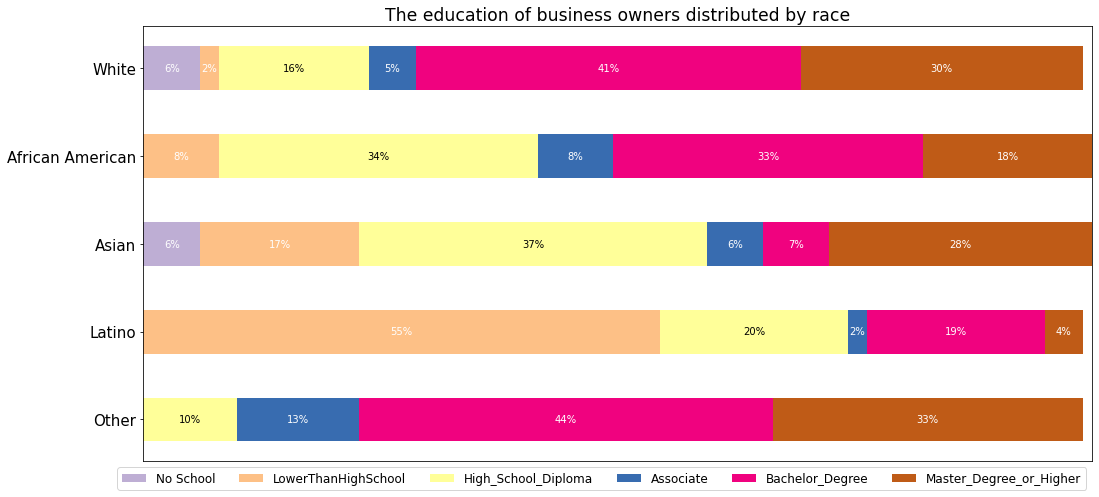

In [6]:
## pluggin in the result from above here
results = {
        'White': list(plugin_busi_graph[0]), 
        'African American': list(plugin_busi_graph[1]),
        'Asian': list(plugin_busi_graph[2]),  
        'Latino': list(plugin_busi_graph[3]),
        'Other': list(plugin_busi_graph[4])
    }


def BO_educate_visualize(results):
    category_names = ['No School','LowerThanHighSchool','High_School_Diploma', 'Associate', 'Bachelor_Degree', 'Master_Degree_or_Higher']

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Accent')(  # 'OrRd_r' #'viridis' #ocean_r, #RdYlBu. #'RdYlGn' #gnuplot2 #YlGnBu_r #set1 
        np.linspace(0.15, 0.85, data.shape[1]))

    #category_colors = ['#fc7d0b','#ffbc79','#c8d0d9','#a3cce9','#5fa2ce','#1170aa']
    fig, ax = plt.subplots(figsize=(17, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color )
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c> 0: #str(int(c))
                ax.text(x, y,'{:.0%}'.format(c/100), ha='center', va='center',
                    color=text_color)
            
        ax.legend(ncol=len(category_names), bbox_to_anchor=(1, 0),
        loc='best', fontsize='large')
        plt.yticks(fontsize=15)
    

    return fig, ax



BO_educate_visualize(results)  ## call fn to plot graph
plt.title('The education of business owners distributed by race',fontsize='xx-large')
plt.show()

From this stacked bar chart above, it can be seen obviously that most of white people who are business owners attianed at least Bachelor degree and higher. Meanwhile,the majority of Latino people has not finished Highschool. 

In addition, this chart demonstrates that most Asians and African American mainly attained High School Diploma.


In [7]:
import matplotlib.pyplot as plt


def Busi_RaceVSGender_visual(df):
    
    bs_owner = df.loc[df['COW']== 7]  ## BusinessOwner sex= female 
    
    White_M = bs_owner[(bs_owner['RACE']== 'White') & (bs_owner['SEX']== 2)].shape[0]
    Black_M = bs_owner[(bs_owner['RACE']== 'African American')& (bs_owner['SEX']== 2)].shape[0]
    Asian_M = bs_owner[(bs_owner['RACE']== 'Asian')& (bs_owner['SEX']==2)].shape[0]
    Latino_M = bs_owner[(bs_owner['RACE']== 'Latino')& (bs_owner['SEX']== 2)].shape[0]
    Others_M = bs_owner[(bs_owner['RACE']== 'Other')& (bs_owner['SEX']== 2)].shape[0]
    
    White_F = bs_owner[(bs_owner['RACE']== 'White') & (bs_owner['SEX']== 1)].shape[0]
    Black_F = bs_owner[(bs_owner['RACE']== 'African American')& (bs_owner['SEX']== 1)].shape[0]
    Asian_F = bs_owner[(bs_owner['RACE']== 'Asian')& (bs_owner['SEX']== 1)].shape[0]
    Latino_F = bs_owner[(bs_owner['RACE']== 'Latino')& (bs_owner['SEX']== 1)].shape[0]
    Others_F = bs_owner[(bs_owner['RACE']== 'Other')& (bs_owner['SEX']== 1)].shape[0]

    
    labels = ['White', 'African Americans', 'Asians', 'Latino', 'Other']
    men_pop = [White_M, Black_M, Asian_M, Latino_M, Others_M]
    women_pop = [White_F, Black_F, Asian_F, Latino_F, Others_F]
    #men_std = [2, 3, 4, 1, 2]
    #women_std = [3, 5, 2, 3, 3]
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots(figsize=(7, 5))


    ax.bar(labels, men_pop, width, label='Men',color='lightgrey') #yerr=men_std, 
    ax.bar(labels, women_pop, width, bottom=men_pop, # yerr=women_std
           label='Women',color='salmon')

    ax.set_ylabel('Population (Count)')
    ax.set_title('The number of the population of business owners by race and gender')

    ax.legend()
    for rec in ax.patches:
        width = rec.get_width()
        height = rec.get_height()
        ax.text(rec.get_x() + rec.get_width()/2 , 
                  rec.get_y() + height ,
                  "{:.0f}".format(height),
                  ha='center', 
                  va='top')

    
    return  plt


<module 'matplotlib.pyplot' from '/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

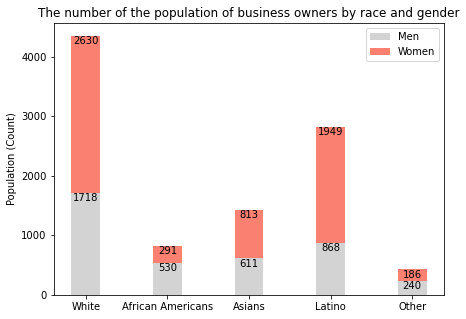

In [8]:
Busi_RaceVSGender_visual(pca191_Ok)

From the stacked bar chart above, we can see that the number of business owners of white was higher than others. Meanwhite, its of African American was the lowest.

Furthermore, tis chart can tell us that the majority of business owners in most races is women. Whereas, only African American trended to have men as business owners more than women.

### Calculation <a id='cal1'> </a> <a id='cal1'> </a>

### Indicator1: Business owners
<strong> The percentage of the percent of employed individuals who are self-employed in their own incorporated business.</strong>

### 2019 

In [9]:
def ind1calc(df):
    numerator = df.loc[df["COW"] == 7, ["RACE"]].groupby("RACE")['RACE'].count() ## .Self-employed in own incorporated business
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    denominator = df.loc[(pca191_Ok["COW"] !=9) & (df["COW"].notna()), ["RACE"]].groupby("RACE")['RACE'].count() # not include
    # >>> 9=unemployed and NA = who aged below 16
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind1_cal = (numerator/denominator) * 100
    table = pd.DataFrame(ind1_cal, columns = ["Ind1"])
    return table

In [10]:
print("Indicator1: Business owners (the percent of employed individuals who are self-employed in their own incorporated business)")
table2019_ind1  = ind1calc(pca191_Ok)
table2019_ind1

Indicator1: Business owners (the percent of employed individuals who are self-employed in their own incorporated business)


,Ind1
African American,1.263816
Asian,1.690569
Latino,3.238527
Other,2.131066
White,3.218547
Total,2.513929


In [11]:
max_ind1_2019 = table2019_ind1['Ind1'].max()
min_ind1_2019 = table2019_ind1['Ind1'].min()
business_ownership19 = round(max_ind1_2019/min_ind1_2019, 3)
print('\n The business_ownership ratio 2019 :',business_ownership19)


 The business_ownership ratio 2019 : 2.562


**  Score is based on the ratio between the percent of Latino and percent of African Americans who are business owners.

### 2018

In [12]:
table2018_ind1 = ind1calc(pca181_Ok)
table2018_ind1

,Ind1
African American,3.142742
Asian,2.614490
Latino,1.388224
Other,5.134943
White,3.870546
Total,3.013310


In [13]:
max_ind1_2018 = table2018_ind1['Ind1'].max()
min_ind1_2018 = table2018_ind1['Ind1'].min()
business_ownership18 = round(max_ind1_2018/min_ind1_2018, 3)
print('\n The business_ownership ratio 2018 :',business_ownership18)


 The business_ownership ratio 2018 : 3.699


**  Score is based on the ratio between the percent of White and percent of Latinos who are business owners.

### Statistical Analysis: Anova  test<a id='st1'> </a>

In [14]:
pca191_Ok.loc[ pca191_Ok['COW']== 7][['RACE','SEMP']].isnull().sum()

RACE    0
SEMP    0
dtype: int64

In [15]:
COW_df = pca191_Ok.loc[ pca191_Ok['COW']== 7][['RACE','SEMP']]

<AxesSubplot:xlabel='SEMP', ylabel='Density'>

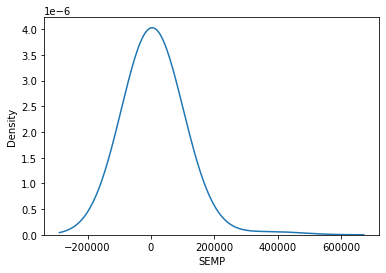

In [16]:
## check if it is a normal distribution
sns.kdeplot(COW_df['SEMP'],cumulative=False,bw=2)

In [17]:
import scipy.stats as stats
resam_race = []
def _df_to_list_col(df):
    list_ = list(df.SEMP) ##choose a column
    return list_
def _Anova_(df):
    COW_df = df.loc[df['COW']== 7][['RACE','SEMP']]
    COW_df = COW_df.dropna()
    
    White =  COW_df.loc[(df['RACE']== 'White')]
    African = COW_df.loc[(df['RACE']== 'African American') ]
    Asian = COW_df.loc[(df['RACE']== 'Asian') ]
    Latino = COW_df.loc[(df['RACE']== 'Latino') ]
    Other =COW_df.loc[(COW_df['RACE']!= 'White')  & (COW_df['RACE']!= 'African American') & (COW_df['RACE']!= 'Asian') & (COW_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    #other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape]  #, other_shape]
    list_race = [(White), (African), (Asian),(Latino)] #Other
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_(pca191_Ok)[0][3])

print('ANOVA between self-employment income among races')
print('The number of each dataset:', _Anova_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)

ANOVA between self-employment income among races
The number of each dataset: 821

 F-Value: 18.468706301788725 
 P-Value: 7.030945569143207e-12



P- value is equal to 7 which is greater than 0.05. Hence, there is no statistically significant difference between the Self-employment income between races.

In [18]:
# del business_W_pop 
# del business_B_pop 
# del business_A_pop 
# del business_L_pop 
del COW_df

## Indicator 4: Disconnected youth <a id='ind4'> </a>
Youth are considered disconnected if they are out of work and out of school. This Indicator measures the percent of the population aged 16-24 who are neither working nor in school. Score is based on ratio between the percents of African American and Asian youth who are disconnected.

In [19]:
pop_w = pca191_Ok[(pca191_Ok['AGEP']>=16)&(pca191_Ok['AGEP']<25)&(pca191_Ok['RACE']=='White')].shape[0]
pop_w

9046

### Data Visualization <a id='dv4'> </a>

Here, I extracted the data where the popluation is between 16 - 24 years old to see the income by race

In [20]:
def _income_Visualize_16_24(df):
    pop_16_24 = pop_16_24 = df[(df['AGEP'] >= 16) & (df['AGEP'] < 25)]
    w_16_24 = pop_16_24[pop_16_24['RACE']=="White"]
    b_16_24 = pop_16_24[pop_16_24['RACE']=="African American"]
    a_16_24 = pop_16_24[pop_16_24['RACE']=="Asian"]
    l_16_24 = pop_16_24[pop_16_24['RACE']=="Latino"]
    o_16_24 = pop_16_24.loc[(pop_16_24['RACE']!="White")|(pop_16_24['RACE']!="African American")|(pop_16_24['RACE']!="Asian")|(pop_16_24['RACE']!="Latino")]
    mean_SSP_W = w_16_24['SEMP'].mean()
    mean_SSP_B = b_16_24['SEMP'].mean()
    mean_SSP_A = a_16_24['SEMP'].mean()
    mean_SSP_L = l_16_24['SEMP'].mean()
    mean_SSP_O = o_16_24['SEMP'].mean()
    
    ## making a dataframe RACE vs Mean 
    data = {'RACE': [ 'White','African American', 'Asian', 'Latino', 'Other'],
        'Income(last 12 months)': [mean_SSP_W, mean_SSP_B,mean_SSP_A,mean_SSP_L,mean_SSP_O ]
        }

    df_employed_income = pd.DataFrame (data, columns = ['RACE','Income(last 12 months)'])
    sns.set(style="whitegrid")

    # Draw a nested barplot to show survival for class and sex
    g = sns.factorplot(x='RACE', y='Income(last 12 months)',  data=df_employed_income,  #, hue="SEX"
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set(title="Average Self-Employment Income In Past 12 months of the 16-24 year old Population Distributed by Race")
    g.set_ylabels("Average Income (dollars)")
    return g

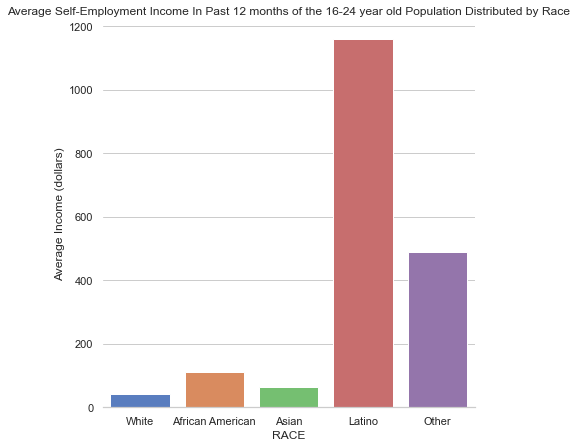

In [21]:
incomeVisByRace = _income_Visualize_16_24(pca191_Ok)
incomeVisByRace 

Above, I would like to know the average of income in last 12 months of the population between 16 - 24 years old distributed by race

From this bar chart above, it can be seen clearly that Latino people made a lot more income when compared to other races in the 16-24 age group, which was approximately 1,200 dollars a month. Meanwhile, White, Asians, and African Americans made money below 200  dollars a month.

In [22]:
def _Disconnected_visualize1_(df):
    pop_16_24 = df[(df['AGEP'] >= 16) & (df['AGEP'] < 25)]
    w_16_24 = pop_16_24[pop_16_24['RACE']=="White"]
    b_16_24 = pop_16_24[pop_16_24['RACE']=="African American"]
    a_16_24 = pop_16_24[pop_16_24['RACE']=="Asian"]
    l_16_24 = pop_16_24[pop_16_24['RACE']=="Latino"]
    o_16_24 = pop_16_24.loc[(pop_16_24['RACE']!="White")|(pop_16_24['RACE']!="African American")|(pop_16_24['RACE']!="Asian")|(pop_16_24['RACE']!="Latino")]
    ## no work(no school = 0 ) (not working  = 3 )
    no_SW_W =  w_16_24[(w_16_24['ESR']==3) | (w_16_24['ESR']==6)& (w_16_24['SCH']==1)].shape[0]
    no_SW_B=  b_16_24[(b_16_24['ESR']==3) | (b_16_24['ESR']==6)& (b_16_24['SCH']==1)].shape[0]
    no_SW_A =  a_16_24[(a_16_24['ESR']==3) | (a_16_24['ESR']==6)& (a_16_24['SCH']==1)].shape[0]
    no_SW_L =  l_16_24[(l_16_24['ESR']==3) | (l_16_24['ESR']==6)& (l_16_24['SCH']==1)].shape[0]
    no_SW_O =  o_16_24[(o_16_24['ESR']==3) | (o_16_24['ESR']==6)& (o_16_24['SCH']==1)].shape[0]


                                                                                                                               
    ## Visualization                                                                                                                           
    fig, ax = plt.subplots(figsize=(18, 7))


    outside_lable = ['White Population','African American Population','Asian Population','Latino Population']
    inside_lable = ['WD', 'WC', 'BD', 'BC', 'AD','AC', 'LD','LC']


    size = 0.3

    vals = np.array([[w_16_24.shape[0], no_SW_W], [b_16_24.shape[0], no_SW_B], [a_16_24.shape[0], no_SW_A], [l_16_24.shape[0],no_SW_L]])
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(4)*4)
    inner_colors = cmap([1, 2, 5, 6, 9, 10,13,14, ])



    ax.pie(vals.sum(axis=1), radius=1, labels= outside_lable , colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(vals.flatten(), radius=1-size, labels = inside_lable ,colors=inner_colors,autopct=  '%1.1f%%'
           ,wedgeprops=dict(width=size, edgecolor='w'))  ##'%1.1f%%'

    plt.legend(loc=(0.9, 0.1))
    handles, labels = ax.get_legend_handles_labels()


    subgroup_names_legs=['WD: White Connected', 'WC:White Disconnected', 'BD: African American Connected', 'BC: African American Disconnected', 
                         'AD:Asian Connected','AC: Asian Disonnected', 'LD: Latino Connected', 'LC: Latino Disconnected']



    ax.legend(handles[4:], subgroup_names_legs,loc=(0.9, 0.1))

    ax.set(aspect="equal", title='The population between 16-24 who are neither attending school nor working by race')
    plt.show()

    return ax
                                                                                                                             

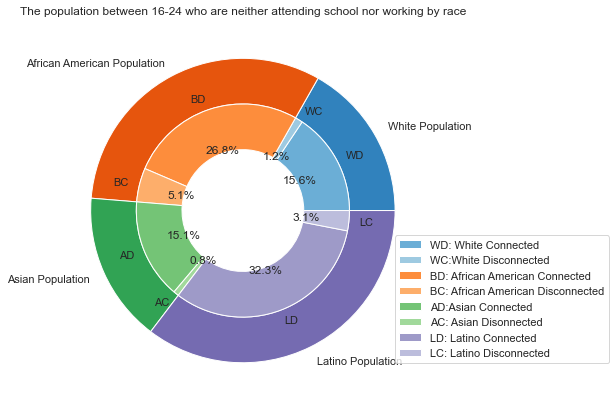

In [23]:
pie_disconnected = _Disconnected_visualize1_(pca191_Ok)

From this pie chart above, we can see that the proportion of the Latino population aged between 16-24 is larger than others following by African American's, White's and Asian's. 

Considering the whole population of the age between 16-24 in Oakland city, we found that the percentage of African American disconnected to school and work is higher than others which is about 5.1% out of the whole population following by 3.1%, 1.2%, and 0.8% of the disconnected of Latino, White, and Asian, respectively.

In [24]:
def _Disconnected_visualize2_(df): 
    pop_16_24 = df[(df['AGEP'] >= 16) & (df['AGEP'] < 25)]
    w_16_24 = pop_16_24[pop_16_24['RACE']=="White"]
    b_16_24 = pop_16_24[pop_16_24['RACE']=="African American"]
    a_16_24 = pop_16_24[pop_16_24['RACE']=="Asian"]
    l_16_24 = pop_16_24[pop_16_24['RACE']=="Latino"]
    o_16_24 = pop_16_24.loc[(pop_16_24['RACE']!="White")|(pop_16_24['RACE']!="African American")|(pop_16_24['RACE']!="Asian")|(pop_16_24['RACE']!="Latino")]
    ## no work(no school = 0 ) (not working  = 3 )
    no_SW_W =  w_16_24[(w_16_24['ESR']==3) | (w_16_24['ESR']==6)& (w_16_24['SCH']==1)].shape[0]
    no_SW_B=  b_16_24[(b_16_24['ESR']==3) | (b_16_24['ESR']==6)& (b_16_24['SCH']==1)].shape[0]
    no_SW_A =  a_16_24[(a_16_24['ESR']==3) | (a_16_24['ESR']==6)& (a_16_24['SCH']==1)].shape[0]
    no_SW_L =  l_16_24[(l_16_24['ESR']==3) | (l_16_24['ESR']==6)& (l_16_24['SCH']==1)].shape[0]
    no_SW_O =  o_16_24[(o_16_24['ESR']==3) | (o_16_24['ESR']==6)& (o_16_24['SCH']==1)].shape[0]


    
    p_dis_w = (no_SW_W/w_16_24.shape[0]) *100
    p_dis_b = (no_SW_B/b_16_24.shape[0]) *100
    p_dis_a = (no_SW_A/a_16_24.shape[0]) *100
    p_dis_l = (no_SW_L/l_16_24.shape[0]) *100
    p_dis_o = (no_SW_O/o_16_24.shape[0]) *100
    label_ = outside_lable = ['African American','Other','Latino','White','Asian'] 
    total_pop_youth = [100-p_dis_b,100-p_dis_o,100-p_dis_l,100-p_dis_w,100-p_dis_a ]
    disconected = [p_dis_b,p_dis_o,p_dis_l,p_dis_w, p_dis_a]

    plt.subplots(figsize=(9, 5))
    #label_bar = 'Disconnected'
    plt.barh(label_, disconected, color="black", label = 'Disconnected')  
    # careful: notice "bottom" parameter became "left"
    plt.barh(label_, total_pop_youth, left= disconected, color="powderblue" ,label = 'Connected')
    plt.legend(loc="best", bbox_to_anchor=(1.0, 1.00), fontsize = 'large')
    # we also need to switch the labels
    plt.xlabel('Percent(%)',fontsize = 'large' )  
    plt.title('The percentage of population aged between 16 - 24 years old being diconnected to school and work by race ', fontsize = 'large')
    plt.show()  
    return plt

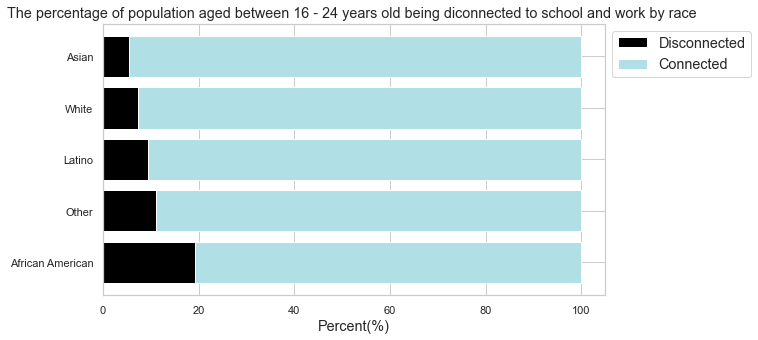

<module 'matplotlib.pyplot' from '/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [25]:
_Disconnected_visualize2_(pca191_Ok)

On the other hand, the stacked bar chart below shows the percentage of the poplulation  of the age between 16-24 who are disconnected to work and school by race. We can see African American has the disconnection percentage higher than others which is around 20% of the whole population. Meanwhile, Asian has the lowest peecentage of being disconnected which is around 5%. 

In [26]:
## define this calculation fn to use later 
def calDisconnectedRace(df):
    EB_1 =df.loc[(df.SCHL == 'No School')].shape[0]
    EB_2 =df.loc[(df.SCHL == 'LowerThanHighSchool')].shape[0]
    EB_3 =df.loc[(df.SCHL == 'HighSchoolDiploma')].shape[0]
    EB_4 =df.loc[(df.SCHL == 'Associate')].shape[0]
    EB_5 =df.loc[(df.SCHL == 'BachelorDegree')].shape[0]
    EB_6 =df.loc[(df.SCHL == 'MasterDegreeAndHigher')].shape[0]
#     return EB_1 , EB_2 , EB_3 , EB_4 , EB_5
    Total = EB_1 + EB_2 + EB_3 + EB_4 + EB_5 + EB_6

    ind1 = (EB_1 *100) / Total
    ind2 = (EB_2 *100) / Total
    ind3 = (EB_3 *100) / Total
    ind4 = (EB_4 *100) / Total
    ind5 = (EB_5 *100) / Total
    ind6 = (EB_6 *100) / Total

    return round(ind1) , round(ind2) , round(ind3) , round(ind4) , round(ind5), round(ind6)


### Visualize business owners with education 
def _educateVSdisconnected_(df):  ## plug in dataset pca____
    disconnected_ppl = df.loc[(df['ESR']==3) | (df['ESR']==6)& (df['SCH']==1)]
    #bs_owner = df.loc[df['COW']== 7]
    sch_att= disconnected_ppl[['RACE','SCHL']].replace({0:'0',1:'No School', 2: 'LowerThanHighSchool'
                                                            ,3:'LowerThanHighSchool',4:'LowerThanHighSchool'
                                                            ,5:'LowerThanHighSchool',6:'LowerThanHighSchool'
                                                            ,7 :'LowerThanHighSchool', 8 :'LowerThanHighSchool'
                                                            ,9:'LowerThanHighSchool', 10:'LowerThanHighSchool'
                                                            ,11:'LowerThanHighSchool',12:'LowerThanHighSchool'
                                                            ,13:'LowerThanHighSchool',14:'LowerThanHighSchool'
                                                            ,15:'LowerThanHighSchool',16:'HighSchoolDiploma'
                                                            ,17:'HighSchoolDiploma',18:'HighSchoolDiploma'
                                                            ,19:'HighSchoolDiploma',20:'Associate'
                                                            ,21:'BachelorDegree',22:'MasterDegreeAndHigher'
                                                            ,23:'MasterDegreeAndHigher',24:'MasterDegreeAndHigher'})
#     sex = bs_owner[['SEX']]
#     educate_owners = pd.concat([sch_att, sex], axis = 'columns')

    
    
    
    
    ## extract data where the class of worker is business ownership in each race
    
    White = sch_att[sch_att['RACE']== 'White']
    Black = sch_att[sch_att['RACE']== 'African American']
    Asian = sch_att[sch_att['RACE']== 'Asian'] 
    Latino = sch_att[sch_att['RACE']== 'Latino'] 
    Others = sch_att[sch_att['RACE']== 'Other']
    
    return calDisconnectedRace(White), calDisconnectedRace(Black), calDisconnectedRace(Asian), calDisconnectedRace(Latino), calDisconnectedRace(Others)



In [27]:
plugin_busi_graph2 = _educateVSdisconnected_(pca191_Ok)

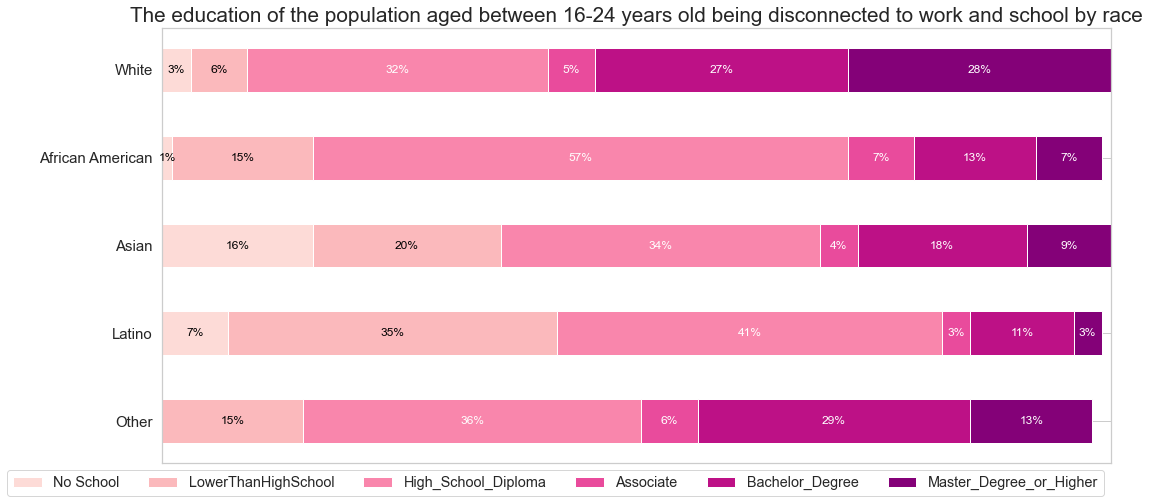

In [28]:
## pluggin in the result from above here
results2 = {
        'White': list(plugin_busi_graph2[0]), 
        'African American': list(plugin_busi_graph2[1]),
        'Asian': list(plugin_busi_graph2[2]),  
        'Latino': list(plugin_busi_graph2[3]),
        'Other': list(plugin_busi_graph2[4])
    }


def DN_educate_visualize(results):
    category_names = ['No School','LowerThanHighSchool','High_School_Diploma', 'Associate', 'Bachelor_Degree', 'Master_Degree_or_Higher']

    labels = list(results2.keys())
    data = np.array(list(results2.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdPu')(  #Blues #ocean_r, #RdYlBu. #'RdYlGn' #gnuplot2 #YlGnBu_r #set1 
        np.linspace(0.15, 0.85, data.shape[1]))
    #category_colors = ['darkviolet','deepskyblue','forestgreen','yellow','orange','lightcoral']
    fig, ax = plt.subplots(figsize=(17, 8))  # '#ff7f00' 'viridis'
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color )
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c> 0: #str(int(c))
                ax.text(x, y,'{:.0%}'.format(c/100), ha='center', va='center',
                    color=text_color)
            
        ax.legend(ncol=len(category_names), bbox_to_anchor=(1, 0),
        loc='best', fontsize='large')
        plt.yticks(fontsize=15)
    

    return fig, ax



DN_educate_visualize(results)  ## call fn to plot graph
plt.title('The education of the population aged between 16-24 years old being disconnected to work and school by race',fontsize='xx-large')
plt.show()

From stacked bar chart above, we can see that the highest education gained of the population who are disconnected to work and school in every race was High School Diploma. Obvouisly, about 57% of African Americans attianed High School Diploma which was higher than its of other races.

Meanwhile, disconnected Asian people had the highest percentage of not attending school which is about 16% of its population.
Unbelievably, over 50% of being disconected of White people attained at least Bachelor degree. 

### Calculation <a id='cal4'> </a>

### Indicator4: Disconnected youth
<strong> The percentage of people who are considered disconnected if they are out of work and out of school in each race.</strong>

### 2019

In [29]:
def ind4calc(df):
    filter_df = df.loc[(df['AGEP'] >= 16) & (df['AGEP'] < 25)]
    index_1 = (filter_df['ESR']==3) | (filter_df['ESR']==6) ## Unemployed
    index_2 = (filter_df['SCH']==1) ## not attended school
    numerator =filter_df.loc[index_1 & index_2, ["RACE"]].groupby("RACE")['RACE'].count()
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    employed_df = filter_df[(filter_df['ESR']!=3) & (['ESR']!=6)] # not include "#3 Unemployed" and "#6 Not in labor force"
    denominator = employed_df.loc[(employed_df['ESR'].notna()) & (employed_df['SCH'].notna()) , ["RACE"]].groupby("RACE")['RACE'].count()
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind4_cal= numerator/denominator*100
    table = pd.DataFrame(ind4_cal, columns = ["Ind4"])
    return table

In [30]:
print("Indicator4: Disconnected youth (The percentage of people who are considered disconnected if they are out of work and out of school in each race.)")
table2019_ind4= ind4calc(pca191_Ok)
table2019_ind4

Indicator4: Disconnected youth (The percentage of people who are considered disconnected if they are out of work and out of school in each race.)


,Ind4
African American,16.394616
Asian,4.397843
Latino,8.331920
Other,7.808564
White,6.021306
Total,9.480224


In [31]:
max_ind4_19 = table2019_ind4['Ind4'].max()
min_ind4_19 = table2019_ind4['Ind4'].min()
disconnected_youth19 = round(max_ind4_19/min_ind4_19, 3)
print('\n The disconnected youth ratio 2019 :',disconnected_youth19)


 The disconnected youth ratio 2019 : 3.728


** Score is based on ratio between the percents of African American and Asian youth who are disconnected.

### 2018

In [32]:
table2018_ind4= ind4calc(pca181_Ok)
table2018_ind4

,Ind4
African American,16.519337
Asian,8.591808
Latino,13.547457
Other,10.876664
White,7.483856
Total,12.076101


In [33]:
max_ind4_2018 = table2018_ind4['Ind4'].max()
min_ind4_2018 = table2018_ind4['Ind4'].min()
disconnected_youth18 = round(max_ind4_2018/min_ind4_2018, 3)
print('\n The disconnected youth ratio 2018 :',disconnected_youth18)


 The disconnected youth ratio 2018 : 2.207


** Score is based on ratio between the percents of African American and white youth who are disconnected.

### Statistical Test: Chi-sq test <a id='st4'> </a>

In [34]:
from scipy.stats import chi2_contingency
import numpy as np

In [35]:
def ChiSq_disconnectedYouth(df):
    from scipy.stats import chi2_contingency
    import numpy as np
    pop_16_24 = df[(df['AGEP'] >= 16) & (df['AGEP'] < 25)]

    pop_16_24['DISCONNECTED'] = np.where(((pop_16_24['ESR']==3) | (pop_16_24['ESR']==6))& (pop_16_24['SCH']==1), 'yes', 'no')
    print("Predicted label values:", pop_16_24['DISCONNECTED'].unique())
    disconnected = pop_16_24[['RACE','DISCONNECTED']]
    
    ## Disconnected youth 2019:  African American(max) vs Asian (min)
    ind_connect = (disconnected['RACE']=="African American") | (disconnected['RACE']=="Asian")
    afri_asian_dis = disconnected[ind_connect]
    discon_chi = pd.crosstab(afri_asian_dis['RACE'], afri_asian_dis['DISCONNECTED'])
    
    graph_chisq = sns.catplot('RACE',data=afri_asian_dis ,kind='count',hue='DISCONNECTED',palette='magma')
    plt.title('The number of business owners of White & African American ')
    
    # Chi-square test of independence.
    c, p, dof, expected = chi2_contingency(discon_chi)
    print("p-Value", p)
    
    return graph_chisq, discon_chi, 
    
    

Predicted label values: ['no' 'yes']
p-Value 2.884261435303527e-141


(<seaborn.axisgrid.FacetGrid at 0x7f93d1802070>,
 DISCONNECTED         no   yes
 RACE                         
 African American  13227  2290
 Asian              8391   367)

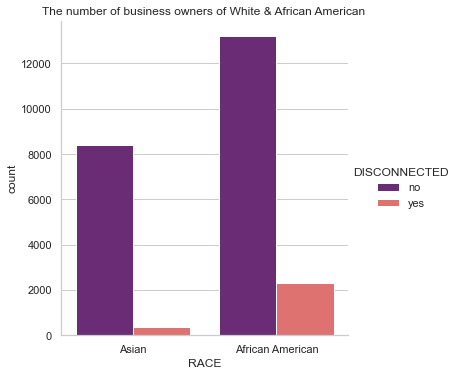

In [36]:
ChiSq_disconnectedYouth(pca191_Ok)

Null Hypothesis(H0): There is no difference between African American and Asian in terms of being disconected to school and work.

p value is 2.88 which is greater than 0.05. Hence, we cannot reject the null hypothesis(H0). There is no statistically significant difference between African American and Asian in terms of of being disconected to school and work.

### INDICATOR 5: Labor Force Participation <a id='ind5'> </a>

This Indicator measures the percent of the population aged 16 and older <strong> who are neither working nor looking for work</strong>. Employed individuals, unemployed individuals who are looking for work and individuals in the armed forces are not included in this measure. Score is based on the ratio between the percents of African Americans and Whites who are not participating in the labor force.

### Data Visualization <a id='dv5'> </a>

Above, I split the 16 year-old and older population data by race, and I extract data with the 'AGEP' column.


In [37]:
def _NotworkForceLabor_visualize_(df): 
    pop_16 = df[(df['AGEP'] >= 16)]
    w_16 = pop_16[pop_16['RACE']=="White"]
    b_16 = pop_16[pop_16['RACE']=="African American"]
    a_16 = pop_16[pop_16['RACE']=="Asian"]
    l_16 = pop_16[pop_16['RACE']=="Latino"]
    o_16 = pop_16.loc[(pop_16['RACE']!="White")|(pop_16['RACE']!="African American")|(pop_16['RACE']!="Asian")|(pop_16['RACE']!="Latino")]
    ## no work(no school = 0 ) (not working  = 3 )
    notW_W =  w_16[(w_16['ESR']==6)].shape[0]
    notW_B=  b_16[(b_16['ESR']==6) ].shape[0]
    notW_A =  a_16[(a_16['ESR']==6)].shape[0]
    notW_L =  l_16[(l_16['ESR']==6)].shape[0]
    notW_O =  o_16[(o_16['ESR']==6)].shape[0]
    
    p_dis_w = (notW_W/w_16.shape[0]) *100
    p_dis_b = (notW_B/b_16.shape[0]) *100
    p_dis_a = (notW_A/a_16.shape[0]) *100
    p_dis_l = (notW_L/l_16.shape[0]) *100
    p_dis_o = (notW_O/o_16.shape[0]) *100
    #label_ = outside_lable = ['White','African American','Asian','Latino', 'Other'] 
    label_ = outside_lable = ['African American','Asian','Other','Latino','White'] 
    
    total_pop = [100-p_dis_b,100-p_dis_a,100-p_dis_o,100-p_dis_l,100-p_dis_w ]
    #total_pop_youth = [w_16_24.shape[0], b_16_24.shape[0], a_16_24.shape[0], l_16_24.shape[0]]
    notwork = [p_dis_b, p_dis_a, p_dis_o, p_dis_l, p_dis_w]

    plt.subplots(figsize=(9, 5))
    #label_bar = 'Disconnected'
    plt.barh(label_, notwork, color="black", label = 'Not_Working& LookingforWork ')  
    # careful: notice "bottom" parameter became "left"
    plt.barh(label_, total_pop, left= notwork, color="pink" ,label = 'Working& LookingforWork')
    plt.legend(loc="best", bbox_to_anchor=(1.0, 1.00), fontsize = 'large')
    # we also need to switch the labels
    plt.xlabel('Percent (%)')  
    plt.title('The percentage of the population aged 16 and older who are neither working nor looking for work in each race', fontsize = 'x-large')
    plt.show()  
    return plt

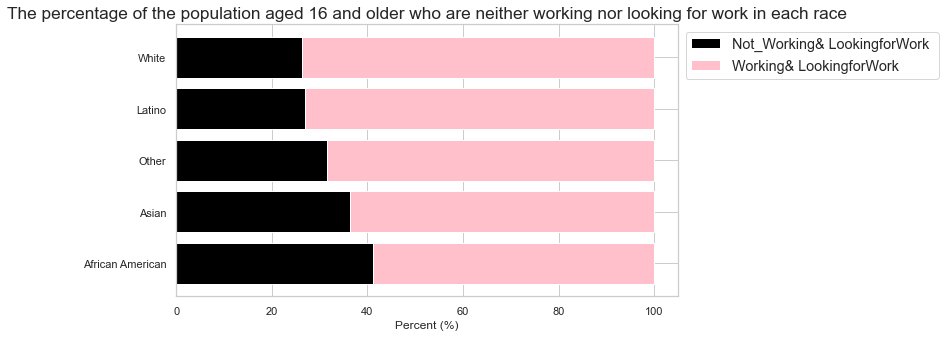

<module 'matplotlib.pyplot' from '/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [38]:
_NotworkForceLabor_visualize_(pca191_Ok)

This stacked bar chart above shows The percentage of the population aged 16 and older who are neither working nor looking for work in each race. It can be found that the percentage of African Americans and Asians for looking for work and working are higher than other races, which were about 40% and 35% respectively. 


This also shows that about 70% of White and Latino people were working and looking for work.

In [39]:
def AGE_his_16(df):
    pop_16_up = pca191_Ok[pca191_Ok['AGEP']>=16]
    pop_16_up.head()
    w_pop_16 = pop_16_up[pop_16_up['RACE']=='White']
    b_pop_16 = pop_16_up[pop_16_up['RACE']=='African American']
    a_pop_16 = pop_16_up[pop_16_up['RACE']=='Asian']
    l_pop_16 = pop_16_up[pop_16_up['RACE']=='Latino']


    w_16= w_pop_16['AGEP']
    b_16 = b_pop_16['AGEP']
    a_16 =a_pop_16['AGEP']
    l_16 = l_pop_16['AGEP']




    # Fixing random state for reproducibility
    np.random.seed(19680801)
    plt.style.use('bmh')


    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(6, 6) )
    ax0.hist(w_16, histtype="stepfilled", bins=25,  density=True, color ='pink')
    ax0.set_title('White')
    #x0.axvline(w_16.mode(), color='green', linewidth=2)

    ax1.hist(b_16, histtype="stepfilled", bins=25,  density=True, color ='lightblue')
    ax1.set_title('African American')
    #x1.axvline(b_16.mode(), color='green', linewidth=2)

    ax2.hist(a_16, histtype="stepfilled", bins=25, density=True, color ='lightyellow')
    ax2.set_title('Asian')
    #x2.axvline(a_16.mode(), color='green', linewidth=2)

    ax3.hist(l_16, histtype="stepfilled", bins=25,  density=True, color ='lightgreen')
    ax3.set_title('Latino')


    fig.suptitle("The distribution of age of 16 and older population by race", fontsize = 'x-large')
    plt.show()


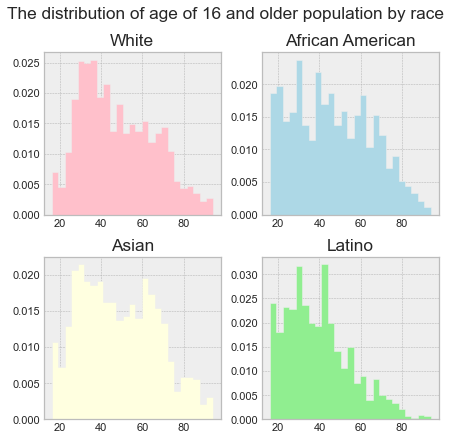

In [40]:
age=AGE_his_16(pca191_Ok)
age

The graph above shows the distribution of the population who aged between 16 and older by each race. 
It can be seen that most of white people aged between 30-40 years old. African American people vary with ages. Asian people aged between 30-40. Meanwhile, Latino people mostly aged around 30, and 50 years old.

In [41]:
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
def _Employment_visual_16_24_(df): # Filter popution between 16 and 24 years old
    pop_w = df[(df['AGEP']>=16)&(df['AGEP']<25)&(df['RACE']=='White')].shape[0]
    pop_b = df[(df['AGEP']>=16)&(df['AGEP']<25)&(df['RACE']=='African American')].shape[0]
    pop_a = df[(df['AGEP']>=16)&(df['AGEP']<25)&(df['RACE']=='Asian')].shape[0]
    pop_l = df[(df['AGEP']>=16)&(df['AGEP']<25)&(df['RACE']=='Latino')].shape[0]
    pop_other = df[(df['AGEP']>=16)&(df['AGEP']<25)].shape[0] - (pop_w+pop_b+pop_a+pop_l)


    ## unemployed between 16 and 24 years old
    #pop_16_24 = df[(df['AGEP'] >= 16) & (df['AGEP'] < 25)]
    pop_16_24 = df[(df['AGEP'] >= 16)]
    unemployed_16_24 = pop_16_24[(pop_16_24['ESR']==3) | (['ESR']==6)]  ##
    pop_un_w = unemployed_16_24[(unemployed_16_24['RACE']=='White')].shape[0]
    pop_un_b = unemployed_16_24[(unemployed_16_24['RACE']=='African American')].shape[0]
    pop_un_a = unemployed_16_24[(unemployed_16_24['RACE']=='Asian')].shape[0]
    pop_un_l = unemployed_16_24[(unemployed_16_24['RACE']=='Latino')].shape[0]
    pop_un_oth = unemployed_16_24.shape[0] - (pop_un_w+pop_un_b+pop_un_a+pop_un_l)
    


    p_unemploy_w=  (pop_un_w/pop_w) *100
    p_unemploy_b = (pop_un_b/pop_b) *100
    p_unemploy_a = (pop_un_a/pop_a) *100
    p_unemploy_l = (pop_un_l/pop_l) *100
    p_unemploy_o = (pop_un_oth/pop_other) *100




    labels = ['Latino', 'Asian','African American', 'Other','White']
    
    unemployed = [p_unemploy_l, p_unemploy_a, p_unemploy_b, p_unemploy_o, p_unemploy_w]
    employed = [100-p_unemploy_l ,100-p_unemploy_a, 100- p_unemploy_b, 100-p_unemploy_o, 100-p_unemploy_w]
    import statistics 
    median_employed= statistics.median(employed)
    #men_std = [2, 3, 4, 1, 2]
    #women_std = [3, 5, 2, 3, 3]
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots(figsize=(7, 6))

    ax.bar(labels,employed, width, label='Employed', color='orange')
    ax.bar(labels, unemployed, width, bottom= employed,
           label='Unemployed', color ='wheat') #yerr=women_std,

    ax.set_ylabel('Percent (%)')
    ax.set_title('The percentage of the population aged between 16 and older employed by race', fontsize = 'x-large')
    ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), title="Employment",fontsize = 'large' )


    ## For annotation in the top od each bar
    for rec in ax.patches:
        width = rec.get_width()
        height = rec.get_height()
        ax.text(rec.get_x() + rec.get_width()/2 , 
                  rec.get_y() + height/2 ,
                  "{:.0f}%".format(height),
                  ha='center', 
                  va='top')
    plt.yticks(fontsize=15)



    #####horizontal line
    # specifying horizontal line type 
    #plt.axhline(y = median_employed, color = 'r', linestyle = '-')
    #line_legend = mpatches.Patch(color = 'r', label = 'Average of being employed')
    #plt.legend(handles = [line_legend], bbox_to_anchor = (1.0, 0.70), loc = 'upper left')
    plt.show()
    return plt

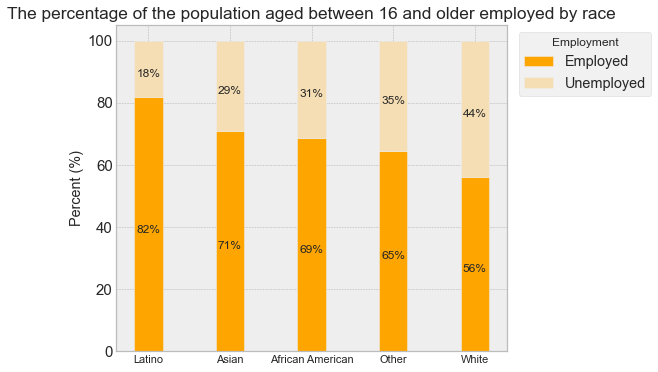

<module 'matplotlib.pyplot' from '/Users/bestuser/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [42]:
_Employment_visual_16_24_(pca191_Ok)

From this stacked bar chart above we can see that about 80% of Latio people aged between 16 - 24 years were employed following by 71% of Asians, 69% of African Americans. Whereas, White people were employed at 56%. 

### Calculation <a id='cal5'> </a>

### Indicator5: Labor Force Participation
<strong>the percent of the population aged 16 and older who are neither working nor looking for work in each race<strong>.

### 2019

In [43]:
def ind5calc(df):
    filter_df = df.loc[df['AGEP']>=16]  # filter who aged 16 and older
    numerator = filter_df.loc[filter_df["ESR"] == 6, ["RACE"]].groupby("RACE")['RACE'].count() # 6 = Not in labor force
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    denominator = filter_df.loc[(filter_df["ESR"].notna()), ["RACE"]].groupby("RACE")['RACE'].count() # not including ppl who aged <16
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind5_cal = round(numerator/denominator * 100, 2)
    table = pd.DataFrame(ind5_cal, columns = ["Ind5"])
    return table

In [44]:
print("Indicator5: Labor Force Participation (the percent of the population aged 16 and older who are neither working nor looking for work in each race.)")
table2019_ind5 = ind5calc(pca191_Ok)
table2019_ind5

Indicator5: Labor Force Participation (the percent of the population aged 16 and older who are neither working nor looking for work in each race.)


,Ind5
African American,41.15
Asian,36.34
Latino,26.97
Other,23.72
White,26.32
Total,31.45


In [45]:
max_ind5_19 = table2019_ind5['Ind5'].max()
min_ind5_19 = table2019_ind5.iloc[4,0]
labor_force19= round(max_ind5_19/min_ind5_19, 3)
print('\n The disconnected youth ratio :',labor_force19)


 The disconnected youth ratio : 1.563


*** Score is based on the ratio between the percents of African Americans and Whites who are not participating in the labor force.

### 2018

In [46]:
table2018_ind5 = ind5calc(pca181_Ok)
table2018_ind5

,Ind5
African American,36.69
Asian,32.28
Latino,27.88
Other,23.05
White,26.74
Total,29.83


In [47]:
max_ind5_18 = table2018_ind5['Ind5'].max()
min_ind5_18 = table2018_ind5.iloc[4,0]
labor_force18= round(max_ind5_18/min_ind5_18, 3)
print('\n The disconnected youth ratio 2018 :',labor_force18)


 The disconnected youth ratio 2018 : 1.372


*** Score is based on the ratio between the percents of African Americans and Whites who are not participating in the labor force.

### Statistic Test: Chi - squared test <a id='st5'> </a>

In [48]:
def ChiSq_LaborForce(df):
    pop_16_up = df[df['AGEP']>=16]
    #not looking for a job and not working
    w_pop_16 = pop_16_up[pop_16_up['RACE']=='White']   ## min
    b_pop_16 = pop_16_up[pop_16_up['RACE']=='African American']  ## max 
    combine_not_work =  pd.concat([w_pop_16 ,b_pop_16 ])
    not_work  = combine_not_work[['RACE','ESR']].replace({0:'No',1:'No', 2:'No',3:'No',4:'No',5:'No',6:'Yes'})
    print("The predicted Label", not_work['ESR'].unique())
    from scipy.stats import chi2_contingency
    notwork_chisq= pd.crosstab(not_work['RACE'], not_work['ESR'])
    c, p, dof, expected = chi2_contingency(notwork_chisq)
    print(f"p-Value {p}")
    return notwork_chisq

In [49]:
ChiSq_LaborForce(pca191_Ok)

The predicted Label ['Yes' 'No']
p-Value 0.0


ESR,No,Yes
RACE,,
African American,59522,41616
White,121327,43332


Null Hypothesis: There is no difference African Americans and Whites in terms of participating in the labor force.

Since p value is 0.0 which is less than 0.05, we need to reject our null hypothesis. Hence, <strong>there is a significant statistically significant difference between African Americans and Whites in terms of participating in the labor force</strong>.

## OTHER INDICATOR CALCULATIONS <a id='other_cal'> </a>

## Indicator 49: Adult Felony Arrests <a id='ind49'> </a>
Public Safety: Incarceration - Adult Felony Arrests
Ratio between the adult felony arrest rates for African Americans and Asians.

### Calculation 

In [50]:
felony = pd.read_csv('arrests_FELONY_2019.csv')
felony['DoB']=pd.to_datetime(felony['Arrest Date and Time'])
felony['Year']= felony['DoB'].dt.year
felony.head()

,Event Type,Arrest Number,Report Number,Arrest Date and Time,Arrest Location,Arrest City,Arrest Beat,Person Association,Arrest Age,Race,Gender,Severity,Statute Code,Statute Code Description,UCR Category,UCR Category Code,DoB,Year
0,ARREST,ARR19-000006,19-000004,1/1/19 0:26,2700 BLOCK 22ND AV,OAKLAND,18Y,ARRESTEE,27,BLACK,MALE,FELONY,O/W-FEL,OUTSIDE WARRANT - FELONY,NaN,NaN,2019-01-01 00:26:00,2019
1,ARREST,ARR19-000023,19-000014,1/1/19 1:40,2500 BLOCK PARKER AV,OAKLAND,30Y,ARRESTEE,29,BLACK,MALE,FELONY,PC29800 (A)(1),FELON/ADDICT/POSSESS/OWN/ETC FIREARM,"WEAPONS - CARRYING, POSSESSING, ETC.",36.0,2019-01-01 01:40:00,2019
2,ARREST,ARR19-000010,19-000014,1/1/19 1:40,2500 BLOCK PARKER AV,OAKLAND,30Y,ARRESTEE,31,BLACK,MALE,FELONY,PC25850 (C)(1),CARRY LOADED FIREARM W/PRIOR FELONY CONVICTION,"WEAPONS - CARRYING, POSSESSING, ETC.",36.0,2019-01-01 01:40:00,2019
3,ARREST,ARR19-000011,19-000014,1/1/19 1:40,7800 BLOCK GARFIELD AV,OAKLAND,30Y,ARRESTEE,32,BLACK,MALE,FELONY,PC25850 (A),CARRY LOADED FIREARM IN PUBLIC UNDER SPEC CIRC...,"WEAPONS - CARRYING, POSSESSING, ETC.",36.0,2019-01-01 01:40:00,2019
4,ARREST,ARR19-000018,19-000094,1/1/19 16:30,700 BLOCK W GRAND AV,OAKLAND,07X,ARRESTEE,56,BLACK,MALE,FELONY,O/W-FEL,OUTSIDE WARRANT - FELONY,NaN,NaN,2019-01-01 16:30:00,2019


In [51]:
felony['Year'].unique()

array([2019])

In [52]:
## Check is the severity is all felony
felony['Severity'].unique()

array(['FELONY', 'FELONY ', 'Felony'], dtype=object)

In [53]:
felony['Race'].unique()

array(['BLACK', 'WHITE', 'HISPANIC', 'SAMOAN', 'CHINESE', 'FILIPINO',
       'OTHER ASIAN', 'CAMBODIAN', 'AMERICAN INDIAN', 'ASIAN INDIAN',
       'VIETNAMESE', 'LAOTIAN', 'HAWAIIAN', 'UNKNOWN ', 'OTHER ',
       'PACIFIC ISLANDER', 'OTHER', 'GUAMANIAN'], dtype=object)

In [54]:
## Data Cleaning
felony.loc[(felony.Race == 'WHITE'), "RACE"] = "White"
felony.loc[(felony.Race == 'BLACK'), "RACE"] = "African American"
felony.loc[(felony.Race == 'HISPANIC'), "RACE"] = "Latino"
felony.loc[(felony.Race == 'CHINESE'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'FILIPINO'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'OTHER ASIAN'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'CAMBODIAN'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'ASIAN INDIAN'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'VIETNAMESE'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'LAOTIAN'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'HAWAIIAN'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'PACIFIC ISLANDER'), "RACE"] = "Asian"
felony.loc[(felony.Race == 'GUAMANIAN'), "RACE"] = "Asian"
felony.loc[(felony.Race ==  'UNKNOWN '), "RACE"] = "Other"
felony.loc[(felony.Race == 'SAMOAN'), "RACE"] = "Other"
felony.loc[(felony.Race ==  'OTHER '), "RACE"] = "Other"
felony.loc[(felony.Race ==  'OTHER'), "RACE"] = "Other"
# felony['Race'] = felony['Race'].fillna(0)
# felony.loc[(felony.Race ==  0), "RACE"] = "Other"

In [55]:
felony['RACE'].unique()

array(['African American', 'White', 'Latino', 'Other', 'Asian', nan],
      dtype=object)

In [56]:
felony['RACE'].sample(10)

910     African American
2761    African American
3056    African American
1844               Asian
1827    African American
1546    African American
951     African American
96      African American
554     African American
610     African American
Name: RACE, dtype: object

White: White 

African: Black

Latino: Hispanic

Asian: Chinese + Filipino, other asian, cambodian, asian indian?  + Laotian, Pacific islander,  guamanian, hawaiian

Other:  other, unknown, American Indian

In [57]:
def ind49calc(df_felony, df_PUMS):
    numerator =df_felony.groupby("RACE")['RACE'].count()
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    denominator = df_PUMS.groupby("RACE")['RACE'].count()
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind49_cal= (numerator/denominator)*100000
    table = pd.DataFrame(ind49_cal, columns = ["Ind49"])
    return table

In [58]:
table2019_ind49 = ind49calc(felony, pca191_Ok)
table2019_ind49

,Ind49
African American,1794.421847
Asian,136.893629
Latino,491.442688
Other,99.839148
White,167.497973
Total,557.550678


In [59]:
max_ind49_19 = table2019_ind49['Ind49'].max()
min_ind49_19 = table2019_ind49.iloc[1,0]
felony19= round(max_ind49_19/min_ind49_19, 3)
print('\n Adult Felony Arrests ratio :',felony19)


 Adult Felony Arrests ratio : 13.108


*** Score is based on the ratio of the adult felony arrest between the percents of African American and Asian.

## Indicator 58: Domestic Violence <a id='ind58'> </a>
This Indicator measures the rate of domestic violence victimization in Oakland by
race/ethnicity. Rate is calculated as the number of domestic violence incidents per 100,000
people of the same race/ethnicity (of any age).

In [60]:
DV = pd.read_csv('2018_2020_DV.csv')
DV['DoB'] = pd.to_datetime(DV['Date and Time'])
DV['Year']= DV['DoB'].dt.year
DV.head()

,Report Number,Location,City,Beat,Date and Time,Association,Age (incident),Race,Gender,Statute Code,Statute Code Description,UCR Category,UCR Category Code,DoB,Year
0,18-000008,3400 BLOCK 64TH AV PL,OAKLAND,29X,1/1/18 0:26,VICTIM,27,BLACK,FEMALE,PC273.5(A),INFLICT CORPORAL INJURY ON SPOUSE/COHABITANT,ASSAULT - OTHER DANGEROUS WEAPON,11.0,2018-01-01 00:26:00,2018
1,18-001140,1000 BLOCK WOOD ST,OAKLAND,02Y,1/1/18 1:00,VICTIM,24,BLACK,FEMALE,PC243 (E)(1),BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,"ASSAULT - OTHER ASSAULTS - SIMPLE, NOT AGGRAVATED",30.0,2018-01-01 01:00:00,2018
2,18-000092,1100 BLOCK 54TH ST,OAKLAND,10X,1/1/18 1:00,VICTIM,43,BLACK,MALE,PC273.55,INFLICT CORPORAL INJURY ON SPOUSE/COHABITANT:W...,ASSAULT - KNIFE OR CUTTING INSTRUMENT,10.0,2018-01-01 01:00:00,2018
3,18-000088,100 BLOCK KERWIN AV,OAKLAND,31Z,1/1/18 1:00,VICTIM,21,UNKNOWN,FEMALE,PC243 (E)(1),BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,"ASSAULT - OTHER ASSAULTS - SIMPLE, NOT AGGRAVATED",30.0,2018-01-01 01:00:00,2018
4,18-000025,2400 BLOCK COLE ST,OAKLAND,27X,1/1/18 1:31,VICTIM,39,HISPANIC,MALE,PC243 (E)(1),BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,"ASSAULT - OTHER ASSAULTS - SIMPLE, NOT AGGRAVATED",30.0,2018-01-01 01:31:00,2018


In [61]:
## Check year
DV['Year'].unique()

array([2018, 2019, 2020])

In [62]:
DV['Race'].unique()

array(['BLACK', 'UNKNOWN ', 'HISPANIC', 'CHINESE', 'WHITE', 'OTHER ASIAN',
       'FILIPINO', 'SAMOAN', 'UNKNOWN', 'ASIAN INDIAN', 'OTHER ',
       'VIETNAMESE', 'OTHER', 'KOREAN', 'CAMBODIAN', 'AMERICAN INDIAN',
       'PACIFIC ISLANDER', 'HAWAIIAN', nan, 'JAPANESE', 'GUAMANIAN'],
      dtype=object)

In [63]:
DV['Association'].unique()

array(['VICTIM'], dtype=object)

In [64]:
## Data Cleaning
DV.loc[(DV.Race == 'WHITE'), "RACE"] = "White"  
DV.loc[(DV.Race == 'BLACK'), "RACE"] = "African American" 
DV.loc[(DV.Race == 'HISPANIC'), "RACE"] = "Latino" 
DV.loc[(DV.Race == 'CHINESE'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'FILIPINO'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'OTHER ASIAN'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'CAMBODIAN'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'ASIAN INDIAN'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'VIETNAMESE'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'KOREAN'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'JAPANESE'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'HAWAIIAN'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'PACIFIC ISLANDER'), "RACE"] = "Asian" 
DV.loc[(DV.Race == 'GUAMANIAN'), "RACE"] = "Asian" 
DV.loc[(DV.Race ==  'UNKNOWN '), "RACE"] = "Other"  
DV.loc[(DV.Race ==  'UNKNOWN'), "RACE"] = "Other" 
DV.loc[(DV.Race == 'SAMOAN'), "RACE"] = "Other" 
DV.loc[(DV.Race ==  'OTHER '), "RACE"] = "Other" 
DV.loc[(DV.Race ==  'OTHER'), "RACE"] = "Other" 
DV.loc[(DV.Race ==  'AMERICAN INDIAN'), "RACE"] = "Other" 
DV['Race'] = DV['Race'].fillna(0) 
DV.loc[(DV.Race ==  0), "RACE"] = "Other"

In [65]:
def ind58calc(df_DoViolence, df_PUMS):
    df_final = df_DoViolence[df_DoViolence['Year']==2019]
    numerator =df_final.groupby("RACE")['RACE'].count()
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    denominator = df_PUMS.groupby("RACE")['RACE'].count()
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind58_cal= (numerator/denominator)*100000
    table = pd.DataFrame(ind58_cal, columns = ["Ind58"])
    return table

In [66]:
table2019_ind58=ind58calc(DV, pca191_Ok)
table2019_ind58

,Ind58
African American,1750.754078
Asian,144.852561
Latino,645.348799
Other,596.261579
White,245.416333
Total,639.896133


In [67]:
max_ind58_19 = table2019_ind58['Ind58'].max()
min_ind58_19 = table2019_ind58.iloc[1,0]
DV19= round(max_ind58_19/min_ind58_19, 3)
print('\n Domestic Violence ratio :',DV19)


 Domestic Violence ratio : 12.086


*** Score is based on the ratio of the Domestic Violence between the percents of African American and Asian.

## Indicator 59: Homicides <a id='ind59'> </a>

This Indicator measures the rate of homicides in Oakland by race/ethnicity. Rate is calculated
as the number of homicides per 100,000 people of the same race/ethnicity (of any age).

In [68]:
homicides = pd.read_csv('2018_2020homicides.csv')
homicides['DoB'] = pd.to_datetime(homicides['Date'])
homicides['Year']= homicides['DoB'].dt.year
homicides.head()

,Case No.,Location,City,Beat,Date,Association,Age,Race,Gender,DoB,Year
0,18-000055,5400 BLK Crittenden St.,Oakland,27Y,01-01-2018,Victim,38.0,H,F,2018-01-01,2018
1,18-000116,3400 BLK Adeline St.,Oakland,07X,01-01-2018,Victim,36.0,B,M,2018-01-01,2018
2,18-001412,9800 BLK Pippin St.,Oakland,31Y,01-08-2018,Victim,58.0,H,M,2018-01-08,2018
3,18-005544,4500 BLK Market St.,Oakland,10Y,01-31-2018,Victim,27.0,B,M,2018-01-31,2018
4,18-006100,62nd St. / Market St.,Oakland,10X,02-03-2018,Victim,27.0,B,M,2018-02-03,2018


In [69]:
homicides['Year'].unique()

array([2018, 2019, 2020])

In [70]:
homicides['Association'].unique()

array(['Victim'], dtype=object)

In [71]:
homicides['Race'].unique()

array(['H', 'B', 'W', 'A', 'I', nan, 'P'], dtype=object)

In [72]:
## Data cleaning
homicides.loc[(homicides.Race == 'H'), "RACE"] = "Latino"  
homicides.loc[(homicides.Race == 'B'), "RACE"] = "African American" 
homicides.loc[(homicides.Race == 'W'), "RACE"] = "White" 
homicides.loc[(homicides.Race ==  'A'), "RACE"] = "Asian" 
homicides.loc[(homicides.Race ==  'I'), "RACE"] = "Asian" 
homicides.loc[(homicides.Race ==   'P'), "RACE"] = "Asian" 
homicides.loc[(homicides.Race != 'H')&(homicides.Race != 'B')&(homicides.Race != 'W')&(homicides.Race != 'A')&(homicides.Race != 'I')&(homicides.Race !=   'P'), "RACE"] = "Other" 
# homicides['Race'] =homicides['Race'].fillna(0) 
# homicides.loc[(homicides.Race ==  0), "RACE"] = "Other"

In [73]:
## Check if there are 5 races
homicides["RACE"].unique()

array(['Latino', 'African American', 'White', 'Asian', 'Other'],
      dtype=object)

In [74]:
def ind59calc(df_homicides, df_PUMS):
    df_final = df_homicides[df_homicides['Year']==2019]
    numerator =df_final.groupby("RACE")['RACE'].count()
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    denominator = df_PUMS.groupby("RACE")['RACE'].count()
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind59_cal= (numerator/denominator)*100000
    table = pd.DataFrame(ind59_cal, columns = ["Ind59"])
    return table

In [75]:
table2019_ind59= ind59calc(homicides, pca191_Ok)
table2019_ind59

,Ind59
African American,40.433120
Asian,3.979466
Latino,10.568660
Other,NaN
Total,11.992056
White,2.120228


In [76]:
max_ind59_19 = table2019_ind59['Ind59'].max()
min_ind59_19 = table2019_ind59.iloc[4,0]
Homicides19= round(max_ind59_19/min_ind59_19, 3)
print('\n Homicides ratio :',Homicides19)

print('\n *** Score is based on the ratio of the Homicides between the percents of African American and White.')


 Homicides ratio : 3.372

 *** Score is based on the ratio of the Homicides between the percents of African American and White.


## Indicator 60: Juvenile Arrest Records  <a id='ind60'> </a>


This Indicator measures the rate of felony arrests of juveniles by race/ethnicity adjusted for
population. This Indicator is measured for Oakland. Rate is calculated as the number of
juvenile felony arrests per 100,000 people of each race/ethnicity that are under 18 years of
age. To determine the number of juveniles of each race/ethnicity in Oakland.

In [77]:
juvenile = pd.read_csv('2019_JUVENILE.csv')
juvenile["DoB"] = pd.to_datetime(juvenile['Arrest Date and Time'])
juvenile['Year']= juvenile['DoB'].dt.year
juvenile.head()

,Event Type,Arrest Number,Report Number,Arrest Date and Time,Arrest Location,Arrest City,Arrest Beat,Person Association,Arrest Age,Race,Gender,Severity,Statute Code,Statute Code Description,UCR Category,UCR Category Code,DoB,Year
0,ARREST,ARR19-000727,19-000312,1/2/19 22:46,8200 BLOCK MACARTHUR BLVD,OAKLAND,35X,ARRESTEE,13,BLACK,MALE,FELONY,VC10851 (A),VEHICLE THEFT - AUTO,MOTOR VEHICLE THEFT - AUTOS,17.0,2019-01-02 22:46:00,2019
1,ARREST,ARR19-000726,19-000312,1/2/19 22:46,83RD AV & MACARTHUR BLVD,OAKLAND,35X,ARRESTEE,14,BLACK,MALE,FELONY,VC2800.2 (A),EVADE PO:DISREGARD SAFETY,NaN,NaN,2019-01-02 22:46:00,2019
2,ARREST,ARR19-000729,19-000312,1/2/19 22:46,82ND AV & MACARTHUR BLVD,OAKLAND,35X,ARRESTEE,15,BLACK,MALE,Felony,PC211,"ROBBERY - STRONG ARM (HANDS, FISTS, FEET, ETC.)","ROBBERY - STRONG-ARM (HANDS, FISTS, FEET, ETC.)",8.0,2019-01-02 22:46:00,2019
3,ARREST,ARR19-000280,19-000320,1/3/19 0:25,0 BLOCK 9TH ST,SAN FRANCISCO,NaN,ARRESTEE,16,HISPANIC,MALE,Felony,PC211,ROBBERY-FIREARM,ROBBERY - FIREARM,5.0,2019-01-03 00:25:00,2019
4,ARREST,ARR19-000281,19-000320,1/3/19 0:25,0 BLOCK 9TH ST,SAN FRANCISCO,NaN,ARRESTEE,17,BLACK,MALE,Felony,PC211,ROBBERY-FIREARM,ROBBERY - FIREARM,5.0,2019-01-03 00:25:00,2019


In [78]:
juvenile['Year'].unique()

array([2019])

In [79]:
juvenile['Race'].unique()

array(['BLACK', 'HISPANIC', 'OTHER ASIAN', 'WHITE', 'UNKNOWN', 'OTHER',
       'OTHER ', 'GUAMANIAN'], dtype=object)

In [80]:
## Data cleaning
juvenile.loc[(juvenile.Race == 'WHITE'), "RACE"] = "White"  
juvenile.loc[(juvenile.Race == 'BLACK'), "RACE"] = "African American" 
juvenile.loc[(juvenile.Race == 'HISPANIC'), "RACE"] = "Latino" 
juvenile.loc[(juvenile.Race == 'OTHER ASIAN'), "RACE"] = "Asian" 
juvenile.loc[(juvenile.Race ==  'UNKNOWN'), "RACE"] = "Other" 
juvenile.loc[(juvenile.Race ==  'OTHER '), "RACE"] = "Other" 
juvenile.loc[(juvenile.Race ==  'OTHER'), "RACE"] = "Other" 
juvenile.loc[(juvenile.Race != 'WHITE')&(juvenile.Race != 'BLACK')&(juvenile.Race != 'HISPANIC')&(juvenile.Race != 'OTHER ASIAN')&(juvenile.Race !=  'UNKNOWN')&(juvenile.Race !=  'OTHER ')&(juvenile.Race !=  'OTHER'), "RACE"] = "Other"

In [81]:
juvenile["RACE"].unique()

array(['African American', 'Latino', 'Asian', 'White', 'Other'],
      dtype=object)

In [82]:
def ind60calc(df_juvenile, df_PUMS):
    numerator =df_juvenile.groupby("RACE")['RACE'].count()
    numerator = numerator.append(pd.Series(numerator.sum(), ['Total']))
    denominator = df_PUMS.groupby("RACE")['RACE'].count()
    denominator = denominator.append(pd.Series(denominator.sum(), ["Total"]))
    ind60_cal= (numerator/denominator)*100000
    table = pd.DataFrame(ind60_cal, columns = ["Ind60"])
    return table

In [83]:
table2019_ind60=ind60calc(juvenile, pca191_Ok)
table2019_ind60

,Ind60
African American,164.158465
Asian,0.795893
Latino,34.348145
Other,13.866548
White,1.060114
Total,42.052145


In [84]:
max_ind60_19 = table2019_ind60['Ind60'].max()
min_ind60_19 = table2019_ind60['Ind60'].min()
juvenile19= round(max_ind60_19/min_ind60_19, 3)
print('\n Juvenile Arrest Ratio :',juvenile19)

print('\n *** Score is based on the ratio of the Juvenile who got arrested between the percents of African American and Asian.')


 Juvenile Arrest Ratio : 206.257

 *** Score is based on the ratio of the Juvenile who got arrested between the percents of African American and Asian.


### Joining tables

In [85]:
table2019 = table2019_ind1.join(table2019_ind4)
table2019 = table2019.join(table2019_ind5)
table2019

,Ind1,Ind4,Ind5
African American,1.263816,16.394616,41.15
Asian,1.690569,4.397843,36.34
Latino,3.238527,8.331920,26.97
Other,2.131066,7.808564,23.72
White,3.218547,6.021306,26.32
Total,2.513929,9.480224,31.45


In [86]:
table2018 = table2018_ind1.join(table2018_ind4)
table2018 = table2018.join(table2018_ind5)
table2018

,Ind1,Ind4,Ind5
African American,3.142742,16.519337,36.69
Asian,2.614490,8.591808,32.28
Latino,1.388224,13.547457,27.88
Other,5.134943,10.876664,23.05
White,3.870546,7.483856,26.74
Total,3.013310,12.076101,29.83


Note that:  

- Ind 1: Business Owners
- Ind4: Disconnected Youth
- Ind5: Labor Force Participation

### Join table (ind 49,58,59,60) ** New one

In [87]:
table2019 = table2019_ind49.join(table2019_ind58)
table2019 = table2019.join(table2019_ind59)
table2019 = table2019.join(table2019_ind60)
table2019

,Ind49,Ind58,Ind59,Ind60
African American,1794.421847,1750.754078,40.433120,164.158465
Asian,136.893629,144.852561,3.979466,0.795893
Latino,491.442688,645.348799,10.568660,34.348145
Other,99.839148,596.261579,NaN,13.866548
White,167.497973,245.416333,2.120228,1.060114
Total,557.550678,639.896133,11.992056,42.052145


## Machine Learning <a id='ml'> </a>

### Logistic Regreesion implementation to predict the employment of the 25 year-old population.

In [88]:
## loading libaries
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import precision_score, classification_report, confusion_matrix, log_loss, accuracy_score # evaluation metric

### Data pre-processing  <a id='data_cleaning'> </a>

In [89]:
### Data pre-processing 
## dummies 
employed = pca191_Ok.loc[pca191_Ok['AGEP']==25]
employed['UNDERGRAD'] = np.where(((employed['SCHL']==21) | (employed['SCHL']==22) |(employed['SCHL']==23)|(employed['SCHL']==24)) , '1', '0')
employed['DIPLOMA']= np.where(((employed['SCHL']==16)| (employed['SCHL']==17) | (employed['SCHL']==18) |(employed['SCHL']==19)|(employed['SCHL']==20) |(employed['SCHL']==21)|(employed['SCHL']==22) |(employed['SCHL']==23)|(employed['SCHL']==24)),'0', '1')  ## #0 no school diploma, #1 has school diploma
employed['SPEAK_ENG'] = np.where(((employed['ENG'].notna())|(employed['ENG']==1) |(employed['ENG']==2)) , '1', '0')
employed['EMPLOYED'] = np.where(((employed['ESR']!=3) & (employed['ESR']!=6)), '1', '0') #1 = employed, #0 = umemployed #filter_df["ESR"].notna())

In [90]:
employed = employed[['RACE','SPEAK_ENG','UNDERGRAD','DIPLOMA','SEX','EMPLOYED','MAR']]
factor = {'White': 0, 'African American': 1, 'Asian':2, 'Latino':3,'Other':4}
employed = employed.applymap(lambda s: factor.get(s) if s in factor else s)
employed = employed.astype(object)

In [91]:
## Check the data types
employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10417 entries, 17494 to 619008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RACE       10417 non-null  object
 1   SPEAK_ENG  10417 non-null  object
 2   UNDERGRAD  10417 non-null  object
 3   DIPLOMA    10417 non-null  object
 4   SEX        10417 non-null  object
 5   EMPLOYED   10417 non-null  object
 6   MAR        10417 non-null  object
dtypes: object(7)
memory usage: 651.1+ KB


In [92]:
## Check if there are NAs
employed.isnull().sum()

RACE         0
SPEAK_ENG    0
UNDERGRAD    0
DIPLOMA      0
SEX          0
EMPLOYED     0
MAR          0
dtype: int64

In [93]:
## Check the balance of the predicted column
employed['EMPLOYED'].value_counts()

1    8152
0    2265
Name: EMPLOYED, dtype: int64

<AxesSubplot:xlabel='EMPLOYED', ylabel='count'>

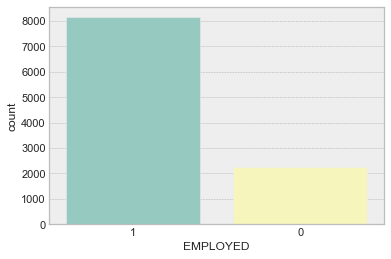

In [94]:
# Visualize the data using seaborn Pairplots
sns.countplot(x = 'EMPLOYED', data = employed, palette = 'Set3')

In [95]:
X = employed.drop(['EMPLOYED'], axis = 'columns')
y = employed['EMPLOYED']
y = y.astype(int)
print(X.shape)
print(y.shape)

(10417, 6)
(10417,)


In [96]:
employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10417 entries, 17494 to 619008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RACE       10417 non-null  object
 1   SPEAK_ENG  10417 non-null  object
 2   UNDERGRAD  10417 non-null  object
 3   DIPLOMA    10417 non-null  object
 4   SEX        10417 non-null  object
 5   EMPLOYED   10417 non-null  object
 6   MAR        10417 non-null  object
dtypes: object(7)
memory usage: 971.1+ KB


In [97]:
employed.head()

,RACE,SPEAK_ENG,UNDERGRAD,DIPLOMA,SEX,EMPLOYED,MAR
17494,3,1,1,0,2,1,1
17495,3,1,1,0,2,1,1
17496,3,1,1,0,2,1,1
17497,3,1,1,0,2,1,1
17498,3,1,1,0,2,1,1


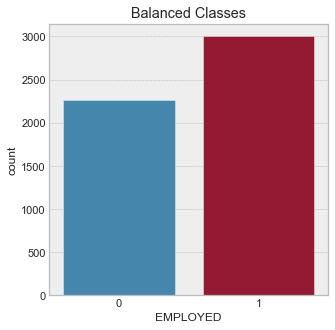

In [98]:
# Shuffle the Dataset.
employed_shuffle = employed.sample(frac=1,random_state=4)

# Put all the employed class in a separate dataset.
employed_df = employed_shuffle[employed_shuffle['EMPLOYED'] == '0']

#Randomly select  observations from the unemployed (majority class)  #employed_df.shape[0]
unemployed_df = employed_shuffle[employed_shuffle['EMPLOYED'] == '1'].sample(n=3000 ,random_state=42)
#Concatenate both dataframes again     
employed_final = pd.concat([employed_df, unemployed_df])

#plot the dataset after the undersampling
plt.figure(figsize=(5, 5))
sns.countplot('EMPLOYED', data= employed_final)
plt.title('Balanced Classes')
plt.show()

In [99]:
employed_final.head()

,RACE,SPEAK_ENG,UNDERGRAD,DIPLOMA,SEX,EMPLOYED,MAR
270985,3,1,0,0,2,0,5
76551,0,0,0,0,1,0,5
270636,3,1,0,0,2,0,5
51333,0,0,0,0,1,0,5
618973,3,0,1,0,2,0,1


In [100]:
print(employed_df.shape,unemployed_df.shape )

(2265, 7) (3000, 7)


### Runing Decision Tree for feature importance <a id='feature_sel'> </a>

In [101]:
# Run Decision tree to select sinificant features
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(employed_final.drop(['EMPLOYED'], axis = 'columns')):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for RACE is : 0.3452689599110645
The feature importance for SPEAK_ENG is : 0.17097573502526758
The feature importance for UNDERGRAD is : 0.18566808880129282
The feature importance for DIPLOMA is : 0.0
The feature importance for SEX is : 0.24406346195693804
The feature importance for MAR is : 0.05402375430543699


In [102]:
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
fi_df

,index,Feature,Feature Importance
0,0,RACE,0.345269
1,4,SEX,0.244063
2,2,UNDERGRAD,0.185668
3,1,SPEAK_ENG,0.170976
4,5,MAR,0.054024
5,3,DIPLOMA,0.000000


In [103]:
# Selecting important columns to keep
columns_to_keep = fi_df['Feature'][0:3]
columns_to_keep

0         RACE
1          SEX
2    UNDERGRAD
Name: Feature, dtype: object

In [104]:
# Print the shapes

print(employed_final.shape)
print(employed_final[columns_to_keep].shape)

(5265, 7)
(5265, 3)


In [105]:
df_final = employed_final[columns_to_keep].head()
df_final.head()

,RACE,SEX,UNDERGRAD
270985,3,2,0
76551,0,1,0
270636,3,2,0
51333,0,1,0
618973,3,2,1


In [106]:
X = employed_final[columns_to_keep]
y = employed_final['EMPLOYED'].values
y = y.astype(int)

print(X.shape)
print(y.shape)

(5265, 3)
(5265,)


In [107]:
employed_final['EMPLOYED'].unique()

array(['0', '1'], dtype=object)

In [108]:
X.shape[0]

5265

In [109]:
y.shape[0]

5265

In [110]:
print('X:',X.head())
print('===========================')

print('y:',y[:5])

X:        RACE SEX UNDERGRAD
270985    3   2         0
76551     0   1         0
270636    3   2         0
51333     0   1         0
618973    3   2         1
y: [0 0 0 0 0]


### K-fold cross validation implemented with Logistic Regression  <a id='kfold'> </a>
### Accuracy rate purpose
Advantage: K-fold cross validation uses all the training data to train the model, by applying k different splits; repeated train-test splits converge to the true accuracy given that the training data is representable for the underlying distribution.

In [111]:
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k = 10
kf = KFold(n_splits=k,shuffle=True, random_state =1) # Define the split - into 2 folds 
accuracy_list = []

for train_index, test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model = LogisticRegression(solver='lbfgs')
    result = model.fit(X_train,y_train)
    y_pred = result.predict(X_test)
    acc = accuracy_score(y_pred , y_test)
    accuracy_list.append(acc)
     
avg_acc_score = sum(accuracy_list)/k
 
print('Accuracy of each fold - {}'.format(accuracy_list))

Accuracy of each fold - [0.7836812144212524, 0.7988614800759013, 0.7666034155597723, 0.8216318785578748, 0.8026565464895635, 0.8346007604562737, 0.8041825095057035, 0.7870722433460076, 0.7737642585551331, 0.7718631178707225]


In [112]:
validation_score = cross_val_score(model, X, y, cv=kf)
print("Average accuracy: {}".format(validation_score.mean()))

Average accuracy: 0.7944917424838204


In [113]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
print("The training Accuracy is: ", result.score(X_train, y_train))

# Accuracy on Test
print("The testing Accuracy is: ", result.score(X_test, y_test))

print(classification_report(y_test, y_pred))

The training Accuracy is:  0.7970035872546951
The testing Accuracy is:  0.7718631178707225
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       232
           1       0.81      0.77      0.79       294

    accuracy                           0.77       526
   macro avg       0.77      0.77      0.77       526
weighted avg       0.77      0.77      0.77       526



In [114]:
from sklearn.metrics import precision_score, classification_report, confusion_matrix
y_test = np.asarray(y_test)
confusion_matrix_LG = confusion_matrix(y_test, y_pred)
confusion_matrix_LG

array([[180,  52],
       [ 68, 226]])

### Confusion Matrix  <a id='confuse'> </a>

<AxesSubplot:>

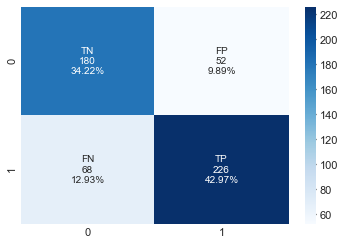

In [115]:
## Confusion Matrix
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_LG.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_LG.flatten()/np.sum(confusion_matrix_LG)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix_LG, annot=labels
            ,fmt="", cmap='Blues')

### From above, 
The logistic regression is implemented to predict the employment of the population aged 25 years old. Normally 25 year-old is the average age for people to start looking for a job and try to make income on their own. This is because most people traditionally graduate their bachelor's degree before 25 years old.
Hence, it is good to understand the factors that these people are being employed or unemployed. 

I manually selected the varibles for predictors, which are "RACE", "SPEAK_ENG", "UNDERGRAD", "SEX", "MAR" and "DIPLOMA", to predict the column "EMPLOYED". Then I run Decision Tree to determine the importance features to use for Logistic regression model.

The most 3 important features that are selected are "RACE", "SEX", and "UNDERGRAD". Then I used these 3 features to predict the "EMPLOYED" column.

Due to having the imbalance of the predicted values(0 and 1), I had to do undersampling in order to balance those two binary labels. Then I did K-fold cross validation to uses all the training data to train the model and find the average accuracy rate. 

Consequently, the "RACE", "SEX", and "UNDERGRAD" variables can predict the outcome about 79%. Also, the statistic report below, we can see that this model can predict the label 0(unemployed) about 73%. Meanwhile, it can predicted the label 1(employed) about 81%. 


### Conclusion,  

Races, Sex and having a Bechelor's degree impact on being employed of the 25 year old population.


## ANOVA TEST  <a id='ano'> </a>

In [116]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### ANOVA between Median Household Income and different Races

In [117]:
pca191_Ok['HINCP'].isnull().sum()

6848

In [118]:
HINCP_df = pca191_Ok[['RACE','HINCP']]
HINCP_df = HINCP_df.dropna()

<AxesSubplot:xlabel='HINCP', ylabel='Density'>

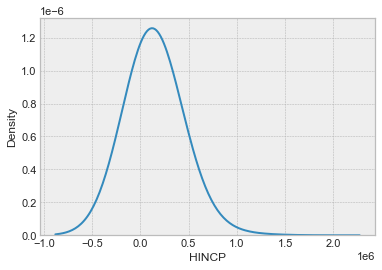

In [119]:
## check if it is normal distribution
sns.kdeplot(HINCP_df['HINCP'],cumulative=False,bw=2)

In [120]:
resam_race = []

def _df_to_list_col(df):
    list_ = list(df.HINCP) ##choose a column
    return list_
def _Anova_HINCP_(df): 
    ## data cleaning
    HINCP_df = df[['RACE','HINCP']]
    HINCP_df = HINCP_df.dropna()
    
    White =  HINCP_df.loc[(HINCP_df['RACE']== 'White')]
    African = HINCP_df.loc[(HINCP_df['RACE']== 'African American') ]
    Asian = HINCP_df.loc[(HINCP_df['RACE']== 'Asian') ]
    Latino =HINCP_df.loc[(HINCP_df['RACE']== 'Latino')]
    Other =HINCP_df.loc[(HINCP_df['RACE']!= 'White')  & (HINCP_df['RACE']!= 'African American') & (HINCP_df['RACE']!= 'Asian') & (HINCP_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape, other_shape]
    list_race = [(White), (African), (Asian),(Latino),(Other)]
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_HINCP_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_HINCP_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_HINCP_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_HINCP_(pca191_Ok)[0][3])
list_o_ano = _df_to_list_col(_Anova_HINCP_(pca191_Ok)[0][4])

print('ANOVA with house hold income among races')
print('The number of each dataset:', _Anova_HINCP_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano,list_o_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)



ANOVA with house hold income among races
The number of each dataset: 35575

 F-Value: 3460.1847325607346 
 P-Value: 0.0


#### Anova result: 
P-value is 0.0 (<0.05). Therefore, there is statistically significant in terms of House Hold Income between different races.

In [121]:
## run Post Hoc to see which groups are different from others
w_df_h= _Anova_HINCP_(pca191_Ok)[0][0]
b_df_h = _Anova_HINCP_(pca191_Ok)[0][1]
a_df_h= _Anova_HINCP_(pca191_Ok)[0][2]
l_df_h =_Anova_HINCP_(pca191_Ok)[0][3]
o_df_h =_Anova_HINCP_(pca191_Ok)[0][4]
import statsmodels.stats.multicomp as mc
def _Post_Hoc_(df_white, df_black, df_asian, df_latino, df_other):
  
    df_join = pd.concat([df_white, df_black, df_asian, df_latino, df_other])

    comp = mc.MultiComparison(df_join['HINCP'], df_join['RACE'])
    post_hoc_res = comp.tukeyhsd()
    results = post_hoc_res.summary()
    
    return results, df_join
print('POST HOC with house hold income among races')
_Post_Hoc_(w_df_h, b_df_h, a_df_h, l_df_h, o_df_h )[0]

POST HOC with house hold income among races


group1,group2,meandiff,p-adj,lower,upper,reject
African American,Asian,54770.9093,0.001,51940.3424,57601.4763,True
African American,Latino,19476.8304,0.001,16646.2634,22307.3973,True
African American,Other,73005.8215,0.001,70175.2545,75836.3885,True
African American,White,108955.5665,0.001,106124.9996,111786.1335,True
Asian,Latino,-35294.079,0.001,-38124.6459,-32463.512,True
Asian,Other,18234.9122,0.001,15404.3452,21065.4791,True
Asian,White,54184.6572,0.001,51354.0902,57015.2242,True
Latino,Other,53528.9911,0.001,50698.4242,56359.5581,True
Latino,White,89478.7362,0.001,86648.1692,92309.3031,True
Other,White,35949.745,0.001,33119.1781,38780.312,True


#### Post Hoc result: 
There is a difference in terms of House Hold Income in every pair of races. 


Text(0, 0.5, 'U.S. Dollar($) ')

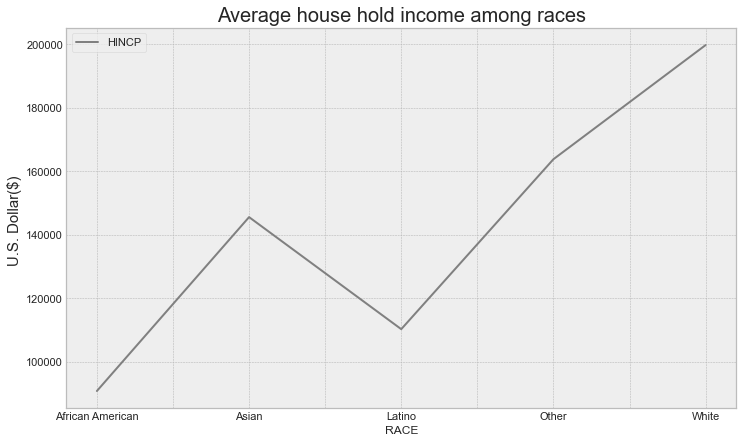

In [122]:
df_Hhold = _Post_Hoc_(w_df_h, b_df_h, a_df_h, l_df_h, o_df_h)[1]
# plot data
fig, ax = plt.subplots(figsize=(12,7))
# use unstack()
df_Hhold.groupby(['RACE']).mean().plot(ax=ax, color = 'grey')

plt.title('Average house hold income among races',fontsize = 20)
plt.ylabel('U.S. Dollar($) ',fontsize = 15 )

White people have the  highest  House hold income when compared with other races which is about 200k yearly.
Whereas, African Americans have the lowest House hold income when compared with other races which is less than half of 100K yearly. 

### ANOVA between Rent and different Races

In [123]:
pca191_Ok['RNTP'].isnull().sum()


303262

In [124]:
RENT_df = pca191_Ok[['RACE','RNTP']]
RENT_df = RENT_df.dropna()

<AxesSubplot:xlabel='RNTP', ylabel='Density'>

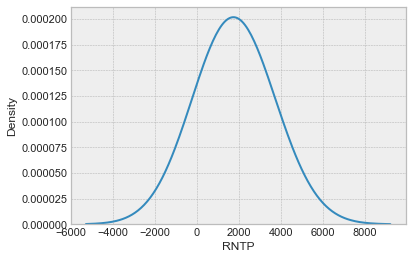

In [125]:
## check if it is normal distribution
sns.kdeplot(RENT_df['RNTP'],cumulative=False,bw=2)

In [126]:
resam_race = []

def _df_to_list_col(df):
    list_ = list(df.RNTP) ##choose a column
    return list_
def _Anova_RaceRent_(df): 
    ## data cleaning
    RENT_df = df[['RACE','RNTP']]
    RENT_df = RENT_df.dropna()
    
    White =  RENT_df.loc[(RENT_df['RACE']== 'White')]
    African = RENT_df.loc[(RENT_df['RACE']== 'African American') ]
    Asian = RENT_df.loc[(RENT_df['RACE']== 'Asian') ]
    Latino =RENT_df.loc[(RENT_df['RACE']== 'Latino')]
    Other =RENT_df.loc[(RENT_df['RACE']!= 'White')  & (RENT_df['RACE']!= 'African American') & (RENT_df['RACE']!= 'Asian') & (RENT_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape, other_shape]
    list_race = [(White), (African), (Asian),(Latino),(Other)]
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_RaceRent_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_RaceRent_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_RaceRent_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_RaceRent_(pca191_Ok)[0][3])
list_o_ano = _df_to_list_col(_Anova_RaceRent_(pca191_Ok)[0][4])

print('ANOVA with monthly rent among races')
print('The number of each dataset:', _Anova_RaceRent_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano, list_o_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)


ANOVA with monthly rent among races
The number of each dataset: 17959

 F-Value: 2487.5767308201753 
 P-Value: 0.0


#### Anova result:  
P-value is 0.0 (<0.05). Therefore, there is statistically significant in terms of rent spent between different races.


In [127]:
## run Post Hoc to see which groups are different from others
w_df_r= _Anova_RaceRent_(pca191_Ok)[0][0]
b_df_r = _Anova_RaceRent_(pca191_Ok)[0][1]
a_df_r= _Anova_RaceRent_(pca191_Ok)[0][2]
l_df_r =_Anova_RaceRent_(pca191_Ok)[0][3]
o_df_r =_Anova_RaceRent_(pca191_Ok)[0][4]
import statsmodels.stats.multicomp as mc
def _Post_Hoc_(df_white, df_black, df_asian, df_latino, df_other):
  
    df_join = pd.concat([df_white, df_black, df_asian, df_latino, df_other])

    comp = mc.MultiComparison(df_join['RNTP'], df_join['RACE'])
    post_hoc_res = comp.tukeyhsd()
    results = post_hoc_res.summary()
    
    return results, df_join
print('POST HOC with monthly rent among races')
_Post_Hoc_(w_df_r, b_df_r, a_df_r, l_df_r, o_df_r)[0]

POST HOC with monthly rent among races


group1,group2,meandiff,p-adj,lower,upper,reject
African American,Asian,372.4428,0.001,348.1361,396.7494,True
African American,Latino,437.0633,0.001,412.7567,461.37,True
African American,Other,491.4355,0.001,467.1288,515.7421,True
African American,White,880.7701,0.001,856.4634,905.0767,True
Asian,Latino,64.6205,0.001,40.3139,88.9272,True
Asian,Other,118.9927,0.001,94.6861,143.2994,True
Asian,White,508.3273,0.001,484.0206,532.634,True
Latino,Other,54.3722,0.001,30.0655,78.6788,True
Latino,White,443.7068,0.001,419.4001,468.0134,True
Other,White,389.3346,0.001,365.0279,413.6412,True


#### Post Hoc result: 
There is a difference in terms  of  rent spent in every pair of races.


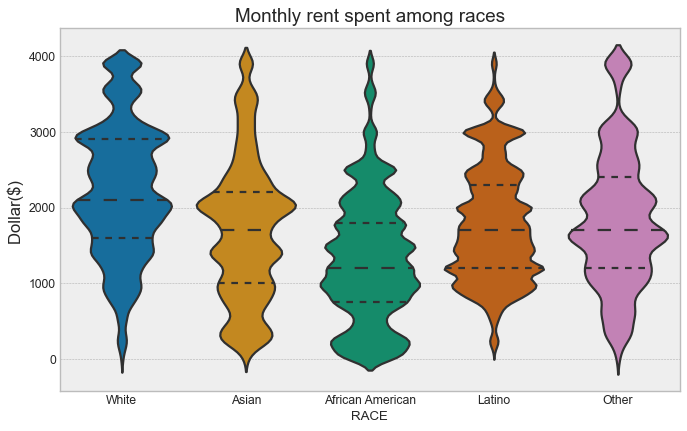

In [128]:
# Draw Plot
plt.figure(figsize=(10,6), dpi= 80)
sns.violinplot(x='RACE', y='RNTP',
                 data=RENT_df,
                 palette="colorblind", scale='width', inner='quartile')

# Decoration
plt.title('Monthly rent spent among races',fontsize = 17)
plt.ylabel('Dollar($) ',fontsize = 15 )

plt.show()

Text(0, 0.5, 'Dollar($) ')

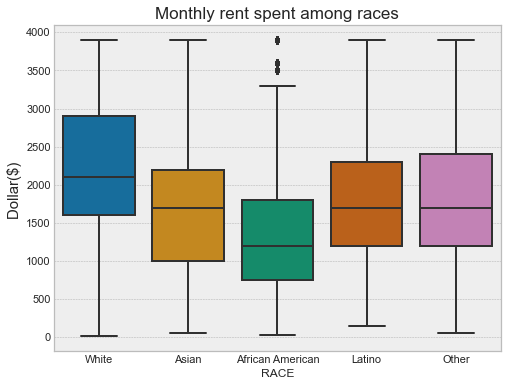

In [129]:
plt.figure(figsize = (8, 6))
sns.boxplot(x='RACE', y='RNTP',
                 data=RENT_df,
                 palette="colorblind" )
plt.title('Monthly rent spent among races',fontsize = 17)
plt.ylabel('Dollar($) ',fontsize = 15 )


White people had the highest median of monthly rent spent when compared to the other races (over $2000).

Whereas, African Americans had the lowest median of monthly rent spent which is about $1200.

### ANOVA between Electricity cost and different races

In [130]:
pca191_Ok['ELEP'].isnull().sum()

37903

In [131]:
ELEP_df = pca191_Ok[['RACE','ELEP']]
ELEP_df = ELEP_df.dropna()

<AxesSubplot:xlabel='ELEP', ylabel='Density'>

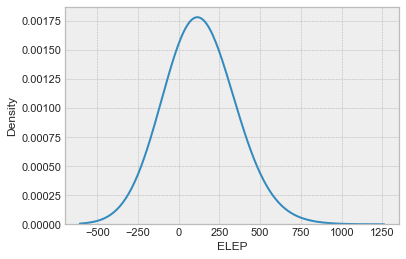

In [132]:
## check if it is normal distribution
sns.kdeplot(ELEP_df ['ELEP'],cumulative=False,bw=2)

In [133]:
resam_race = []

def _df_to_list_col(df):
    list_ = list(df.ELEP) ##choose a column
    return list_
def _Anova_ELEP_(df): 
    ## data cleaning
    ELEP_df = df[['RACE','ELEP']]
    ELEP_df = ELEP_df.dropna()
    
    White =  ELEP_df.loc[(ELEP_df['RACE']== 'White')]
    African = ELEP_df.loc[(ELEP_df['RACE']== 'African American') ]
    Asian =ELEP_df.loc[(ELEP_df['RACE']== 'Asian') ]
    Latino =ELEP_df.loc[(ELEP_df['RACE']== 'Latino')]
    Other =ELEP_df.loc[(ELEP_df['RACE']!= 'White')  & (ELEP_df['RACE']!= 'African American') & (ELEP_df['RACE']!= 'Asian') & (ELEP_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape, other_shape]
    list_race = [(White), (African), (Asian),(Latino), (Other)]
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_ELEP_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_ELEP_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_ELEP_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_ELEP_(pca191_Ok)[0][3])
list_o_ano = _df_to_list_col(_Anova_ELEP_(pca191_Ok)[0][4])
print('ANOVA with monthly electricity cost among races')
print('The number of each dataset:', _Anova_ELEP_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano, list_o_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)

ANOVA with monthly electricity cost among races
The number of each dataset: 33651

 F-Value: 447.1154860012264 
 P-Value: 0.0


#### Anova result: 
P-value is 0.0 (<0.05). Therefore, there is statistically significant in terms of monthly electricity between different races

In [134]:
## run Post Hoc to see which groups are different from others
w_df_e= _Anova_ELEP_(pca191_Ok)[0][0]
b_df_e = _Anova_ELEP_(pca191_Ok)[0][1]
a_df_e= _Anova_ELEP_(pca191_Ok)[0][2]
l_df_e =_Anova_ELEP_(pca191_Ok)[0][3]
o_df_e = _Anova_ELEP_(pca191_Ok)[0][4]
import statsmodels.stats.multicomp as mc
def _Post_Hoc_(df_white, df_black, df_asian, df_latino, df_other):
  
    df_join = pd.concat([df_white, df_black, df_asian, df_latino, df_other])

    comp = mc.MultiComparison(df_join['ELEP'], df_join['RACE'])
    post_hoc_res = comp.tukeyhsd()
    results = post_hoc_res.summary()
    
    return results, df_join

print('POST HOC with monthly electricity cost among races')
_Post_Hoc_(w_df_e, b_df_e, a_df_e, l_df_e, o_df_e)[0]

POST HOC with monthly electricity cost among races


group1,group2,meandiff,p-adj,lower,upper,reject
African American,Asian,-26.6533,0.001,-28.8079,-24.4987,True
African American,Latino,-28.1975,0.001,-30.3521,-26.0429,True
African American,Other,-26.7763,0.001,-28.9309,-24.6217,True
African American,White,-21.6204,0.001,-23.775,-19.4658,True
Asian,Latino,-1.5442,0.2885,-3.6988,0.6104,False
Asian,Other,-0.123,0.9,-2.2776,2.0316,False
Asian,White,5.0329,0.001,2.8783,7.1875,True
Latino,Other,1.4212,0.3749,-0.7334,3.5758,False
Latino,White,6.5771,0.001,4.4225,8.7317,True
Other,White,5.1559,0.001,3.0013,7.3105,True


#### Post Hoc result:
There is a difference in terms of monthly electricity in most pair of races except Asian and Latino and Latino and Other.


Text(0.5, 0, 'U.S. Dollar($) ')

<Figure size 1368x360 with 0 Axes>

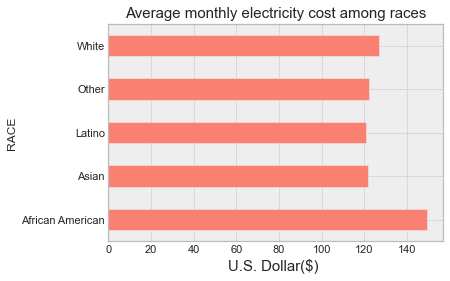

In [135]:
plt.figure(figsize = (19, 5))
ELEP_df.groupby(['RACE']).mean().plot(kind='barh', legend=False, color='salmon')
plt.title('Average monthly electricity cost among races',fontsize = 15)
plt.xlabel('U.S. Dollar($) ',fontsize = 15 )

From the bar chart, we can see that African Americans spent on the electricity monthly bill higher than other races, which is about $140. 

### ANOVA between hours worked per week and different Races

In [136]:
pca191_Ok['WKHP'].isnull().sum()

265060

In [137]:
WKHP_df = pca191_Ok[['RACE','WKHP']]
WKHP_df = WKHP_df.dropna()

<AxesSubplot:xlabel='WKHP', ylabel='Density'>

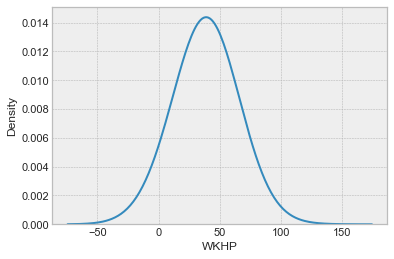

In [138]:
## check if it is normal distribution
sns.kdeplot(WKHP_df['WKHP'],cumulative=False,bw=2)

In [139]:
resam_race = []

def _df_to_list_col(df):
    list_ = list(df.WKHP) ##choose a column
    return list_
def _Anova_WKHP_(df): 
    ## data cleaning
    WKHP_df = df[['RACE','WKHP']]
    WKHP_df = WKHP_df.dropna()
    
    White =  WKHP_df.loc[(WKHP_df['RACE']== 'White')]
    African = WKHP_df.loc[(WKHP_df['RACE']== 'African American') ]
    Asian =WKHP_df.loc[(WKHP_df['RACE']== 'Asian') ]
    Latino =WKHP_df.loc[(WKHP_df['RACE']== 'Latino')]
    Other =WKHP_df.loc[(WKHP_df['RACE']!= 'White')  & (WKHP_df['RACE']!= 'African American') & (WKHP_df['RACE']!= 'Asian') & (WKHP_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape, other_shape]
    list_race = [(White), (African), (Asian),(Latino), (Other)]
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_WKHP_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_WKHP_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_WKHP_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_WKHP_(pca191_Ok)[0][3])
list_o_ano = _df_to_list_col(_Anova_WKHP_(pca191_Ok)[0][4])



print('ANOVA with usual hours worked per week among races')
print('The number of each dataset:', _Anova_WKHP_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano, list_o_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)



ANOVA with usual hours worked per week among races
The number of each dataset: 19202

 F-Value: 138.4117546173967 
 P-Value: 3.6617215276639623e-118


#### Anova result:  
P-value is 3.66e-118 (<0.05). Therefore, there is statistically significant in terms of  usual hours worked per week between different races.

In [140]:
## run Post Hoc to see which groups are different from others
w_df_hr= _Anova_WKHP_(pca191_Ok)[0][0]
b_df_hr = _Anova_WKHP_(pca191_Ok)[0][1]
a_df_hr= _Anova_WKHP_(pca191_Ok)[0][2]
l_df_hr =_Anova_WKHP_(pca191_Ok)[0][3]
o_df_hr = _Anova_WKHP_(pca191_Ok)[0][4]
import statsmodels.stats.multicomp as mc
def _Post_Hoc_(df_white, df_black, df_asian, df_latino, df_other):
  
    df_join = pd.concat([df_white, df_black, df_asian, df_latino, df_other])

    comp = mc.MultiComparison(df_join['WKHP'], df_join['RACE'])
    post_hoc_res = comp.tukeyhsd()
    results = post_hoc_res.summary()
    return results, df_join
print('POST HOC with usual hours worked per week among races')
_Post_Hoc_(w_df_hr, b_df_hr, a_df_hr, l_df_hr, o_df_hr)[0]

POST HOC with usual hours worked per week among races


group1,group2,meandiff,p-adj,lower,upper,reject
African American,Asian,1.7838,0.001,1.4349,2.1328,True
African American,Latino,1.5663,0.001,1.2174,1.9153,True
African American,Other,2.8386,0.001,2.4897,3.1876,True
African American,White,2.2647,0.001,1.9158,2.6137,True
Asian,Latino,-0.2175,0.4355,-0.5664,0.1315,False
Asian,Other,1.0548,0.001,0.7058,1.4037,True
Asian,White,0.4809,0.0016,0.1319,0.8298,True
Latino,Other,1.2723,0.001,0.9233,1.6212,True
Latino,White,0.6984,0.001,0.3494,1.0473,True
Other,White,-0.5739,0.001,-0.9228,-0.225,True


#### Post Hoc result: 
There is a  difference in terms of usual hours worked per week in most pair of races except Asian and Latino.

Text(0.5, 0, 'Hours ')

<Figure size 1368x360 with 0 Axes>

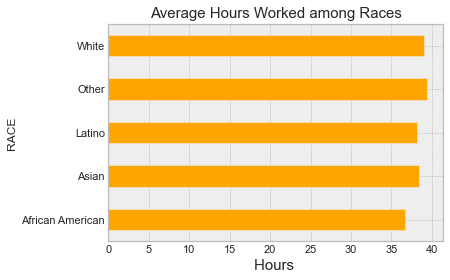

In [141]:
plt.figure(figsize = (19, 5))
WKHP_df.groupby(['RACE']).mean().plot(kind='barh', legend=False, color='orange')
plt.title('Average Hours Worked among Races',fontsize = 15)
plt.xlabel('Hours ',fontsize = 15 )

From the bar chart above, White people earned more work hours when compared to other races. Meanwhile, African American spent less work hours when compared to others.

### ANOVA between travel time to work and different Races


In [142]:
pca191_Ok['JWMNP'].isnull().sum()

315753

In [143]:
JWMNP_df = pca191_Ok[['RACE','JWMNP']]
JWMNP_df = JWMNP_df.dropna()

<AxesSubplot:xlabel='JWMNP', ylabel='Density'>

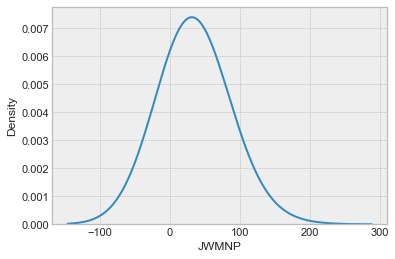

In [144]:
## check if it is normal distribution
sns.kdeplot(JWMNP_df['JWMNP'],cumulative=False,bw=2)

In [145]:
resam_race = []

def _df_to_list_col(df):
    list_ = list(df.JWMNP) ##choose a colume
    return list_
def _Anova_TravelTime_(df): 
    ## data cleaning
    TravelTime_df = df[['RACE','JWMNP']]
    TravelTime_df =TravelTime_df.dropna()
    
    White =  TravelTime_df.loc[(TravelTime_df['RACE']== 'White')]
    African = TravelTime_df.loc[(TravelTime_df['RACE']== 'African American') ]
    Asian =TravelTime_df.loc[(TravelTime_df['RACE']== 'Asian') ]
    Latino =TravelTime_df.loc[(TravelTime_df['RACE']== 'Latino')]
    Other =TravelTime_df.loc[(TravelTime_df['RACE']!= 'White')  & (TravelTime_df['RACE']!= 'African American') & (TravelTime_df['RACE']!= 'Asian') & (TravelTime_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape, other_shape]
    list_race = [(White), (African), (Asian),(Latino), (Other)]
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_TravelTime_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_TravelTime_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_TravelTime_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_TravelTime_(pca191_Ok)[0][3])
list_o_ano = _df_to_list_col(_Anova_TravelTime_(pca191_Ok)[0][4])

print('ANOVA with travel time to work among races')
print('The number of each dataset:', _Anova_TravelTime_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano, list_o_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)



ANOVA with travel time to work among races
The number of each dataset: 16160

 F-Value: 110.97876930333967 
 P-Value: 1.639706791427466e-94


#### Anova result: 
P-value is 1.63e-94 (<0.05). Therefore, there is statistically significant in terms of  Travel time to work  between different races.

In [146]:
## run Post Hoc to see which groups are different from others
w_df_tra= _Anova_TravelTime_(pca191_Ok)[0][0]
b_df_tra = _Anova_TravelTime_(pca191_Ok)[0][1]
a_df_tra= _Anova_TravelTime_(pca191_Ok)[0][2]
l_df_tra =_Anova_TravelTime_(pca191_Ok)[0][3]
o_df_tra = _Anova_TravelTime_(pca191_Ok)[0][4]
import statsmodels.stats.multicomp as mc
def _Post_Hoc_(df_white, df_black, df_asian, df_latino, df_other):
  
    df_join = pd.concat([df_white, df_black, df_asian, df_latino, df_other])

    comp = mc.MultiComparison(df_join['JWMNP'], df_join['RACE'])
    post_hoc_res = comp.tukeyhsd()
    results = post_hoc_res.summary()
    return results, df_join
print('POST HOC with Travel time to work among races')
_Post_Hoc_(w_df_tra, b_df_tra, a_df_tra, l_df_tra, o_df_tra)[0]

POST HOC with Travel time to work among races


group1,group2,meandiff,p-adj,lower,upper,reject
African American,Asian,2.6707,0.001,1.9152,3.4262,True
African American,Latino,-2.6692,0.001,-3.4247,-1.9137,True
African American,Other,1.7904,0.001,1.0349,2.5459,True
African American,White,1.1239,0.001,0.3684,1.8794,True
Asian,Latino,-5.3399,0.001,-6.0954,-4.5844,True
Asian,Other,-0.8803,0.0129,-1.6358,-0.1248,True
Asian,White,-1.5468,0.001,-2.3023,-0.7914,True
Latino,Other,4.4596,0.001,3.7041,5.2151,True
Latino,White,3.7931,0.001,3.0376,4.5486,True
Other,White,-0.6665,0.1136,-1.422,0.089,False


#### Post Hoc result: 
There is a  difference in terms of  Travel time to work in most pair of races except White and Other.

Text(0.5, 0, 'Time (min) ')

<Figure size 1368x360 with 0 Axes>

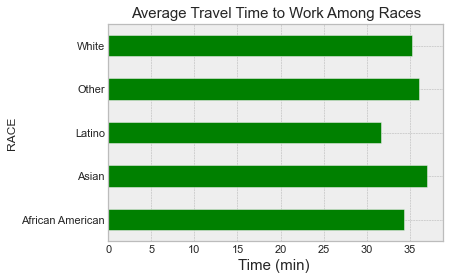

In [147]:
plt.figure(figsize = (19, 5))
JWMNP_df.groupby(['RACE']).mean().plot(kind='barh', legend=False, color='green')
plt.title('Average Travel Time to Work Among Races',fontsize = 15)
plt.xlabel('Time (min) ',fontsize = 15 )

From the bar chart, we can see that Asian spent the travel time to work time higher than others which is about 38 mim. Meanwhile, Latino spent less time to work which is about 32 min.

### ANOVA between Total income and different Races 

In [148]:
pca191_Ok['PERNP'].isnull().sum()

109548

In [149]:
TotalInc_df = pca191_Ok[['RACE','PERNP']]
TotalInc_df =TotalInc_df.dropna()

<AxesSubplot:xlabel='PERNP', ylabel='Density'>

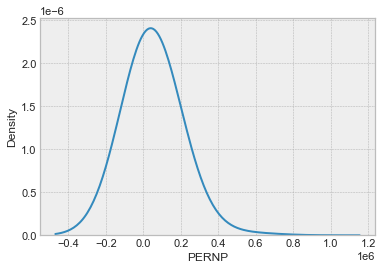

In [150]:
## check if it is normal distribution
sns.kdeplot(TotalInc_df['PERNP'],cumulative=False,bw=2)

In [151]:
resam_race = []

def _df_to_list_col(df):
    list_ = list(df.PERNP) ##choose a colume
    return list_
def _Anova_TotalInc_(df): 
    ## data cleaning
    TotalInc_df = df[['RACE','PERNP']]
    TotalInc_df =TotalInc_df.dropna()
    
    White =  TotalInc_df.loc[(TotalInc_df['RACE']== 'White')]
    African = TotalInc_df.loc[(TotalInc_df['RACE']== 'African American') ]
    Asian =TotalInc_df.loc[(TotalInc_df['RACE']== 'Asian') ]
    Latino =TotalInc_df.loc[(TotalInc_df['RACE']== 'Latino')]
    Other =TotalInc_df.loc[(TotalInc_df['RACE']!= 'White')  & (TotalInc_df['RACE']!= 'African American') & (TotalInc_df['RACE']!= 'Asian') & (TotalInc_df['RACE']!= 'Latino')] 
    
    white_shape = White.shape[0]
    african_shape = African.shape[0]
    asian_shape = Asian.shape[0]
    latino_shape = Latino.shape[0]
    other_shape = Other.shape[0]
    list_PopRace = [white_shape,african_shape, asian_shape, latino_shape, other_shape]
    list_race = [(White), (African), (Asian),(Latino),(Other)]
    min_pop = min(list_PopRace) 
    
    for i in list_race:
        if len(i) != min_pop:
            i = i.sample(n = min_pop,random_state=4)
            resam_race.append(i)
        else:
            resam_race.append(i)  
    
    return  resam_race, min_pop

## extract the feature that we want to run in anova 
list_w_ano = _df_to_list_col(_Anova_TotalInc_(pca191_Ok)[0][0])
list_b_ano = _df_to_list_col(_Anova_TotalInc_(pca191_Ok)[0][1])
list_a_ano = _df_to_list_col(_Anova_TotalInc_(pca191_Ok)[0][2])
list_l_ano = _df_to_list_col(_Anova_TotalInc_(pca191_Ok)[0][3])
list_o_ano = _df_to_list_col(_Anova_TotalInc_(pca191_Ok)[0][4])

print('ANOVA with total income among races')
print('The number of each dataset:', _Anova_TotalInc_(pca191_Ok)[1])

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(list_w_ano, list_b_ano, list_a_ano, list_l_ano, list_o_ano)
print('\n F-Value:', fvalue,'\n P-Value:', pvalue)



ANOVA with total income among races
The number of each dataset: 24659

 F-Value: 1473.579442072189 
 P-Value: 0.0


#### Anova result:  
P-value is 0.0 (<0.05). Therefore, there is statistically significant in terms of  person's earnings between different races.


In [152]:
## run Post Hoc to see which groups are different from others
w_df_t= _Anova_TotalInc_(pca191_Ok)[0][0]
b_df_t = _Anova_TotalInc_(pca191_Ok)[0][1]
a_df_t= _Anova_TotalInc_(pca191_Ok)[0][2]
l_df_t =_Anova_TotalInc_(pca191_Ok)[0][3]
o_df_t = _Anova_TotalInc_(pca191_Ok)[0][4]
import statsmodels.stats.multicomp as mc
def _Post_Hoc_(df_white, df_black, df_asian, df_latino, df_other):
  
    df_join = pd.concat([df_white, df_black, df_asian, df_latino, df_other])

    comp = mc.MultiComparison(df_join['PERNP'], df_join['RACE'])
    post_hoc_res = comp.tukeyhsd()
    results = post_hoc_res.summary()
    return results, df_join
print('POST HOC with total income  among races')
_Post_Hoc_(w_df_t, b_df_t, a_df_t, l_df_t, o_df_t)[0]

POST HOC with total income  among races


group1,group2,meandiff,p-adj,lower,upper,reject
African American,Asian,18054.1356,0.001,16296.9416,19811.3296,True
African American,Latino,6775.5185,0.001,5018.3245,8532.7125,True
African American,Other,19329.8621,0.001,17572.6681,21087.0561,True
African American,White,45770.9226,0.001,44013.7286,47528.1166,True
Asian,Latino,-11278.6171,0.001,-13035.8111,-9521.4231,True
Asian,Other,1275.7265,0.2756,-481.4675,3032.9205,False
Asian,White,27716.787,0.001,25959.593,29473.981,True
Latino,Other,12554.3436,0.001,10797.1496,14311.5377,True
Latino,White,38995.4041,0.001,37238.2101,40752.5981,True
Other,White,26441.0605,0.001,24683.8665,28198.2545,True


#### Post Hoc result: 
There is a  difference between person's earnings in most pair of races except Asian and Other.

Text(0.5, 0, 'U.S. Dollar($) ')

<Figure size 1368x360 with 0 Axes>

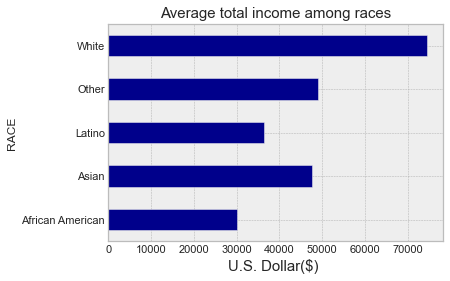

In [153]:
plt.figure(figsize = (19, 5))
TotalInc_df.groupby(['RACE']).mean().plot(kind='barh', legend=False, color='darkblue')
plt.title('Average total income among races',fontsize = 15)
plt.xlabel('U.S. Dollar($) ',fontsize = 15 )

From  the bar chart  shows that white people earned double money when compared to African Americans  which is about 75k  a year.

Whereas, African Americans  earned about 30k a  year. 


In [154]:
del TotalInc_df
del WKHP_df
del ELEP_df
del RENT_df
del HINCP_df
del JWMNP_df

### ANOVA RESULT TABLE

In [155]:
Ano_data = {'Anova Test ':['Median Household Income', 'Monthly Rent', 'Monthly Electricity Cost', 'Personal Earnings','Weekly Hours Worked','Travel Time to Work '],
        'P-value':[0.0, 0.0, 0.0, 0.0,3.66e-118, 1.63e-94 ],
        'Result': ['significant','significant','significant','significant','significant','significant'],
        'The highest significant pair of races': ['White/ African American', 'White/ African American','African American/ Latino', 'White/ African American', 'White/ African American', 'Asian/Latino'], 
            'Post Hoc Result: Mean Difference': [108955.57, 880.77,-28.20,45770.92,2.2647 ,-5.3399],
        'Exception (not significant) ':['-','-','Asian/Latino - Asian/Other - Latino/Other', 'Asian/Other','Asian/Latino', 'White/Other']
       }
AnoResult_df = pd.DataFrame(Ano_data)

AnoResult_df

,Anova Test,P-value,Result,The highest significant pair of races,Post Hoc Result: Mean Difference,Exception (not significant)
0,Median Household Income,0.000000e+00,significant,White/ African American,108955.5700,-
1,Monthly Rent,0.000000e+00,significant,White/ African American,880.7700,-
2,Monthly Electricity Cost,0.000000e+00,significant,African American/ Latino,-28.2000,Asian/Latino - Asian/Other - Latino/Other
3,Personal Earnings,0.000000e+00,significant,White/ African American,45770.9200,Asian/Other
4,Weekly Hours Worked,3.660000e-118,significant,White/ African American,2.2647,Asian/Latino
5,Travel Time to Work,1.630000e-94,significant,Asian/Latino,-5.3399,White/Other
